In [7]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter #ExcelWriter and ExcelFile are classes from Pandas that provide functionality for reading and writing Excel files
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns #data visualization
sns.set() #data visualization
sns.set(style='white')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

### **Reading in the data**

In [8]:
cleaned_df= pd.read_csv('Cleaned_PCOS_Final.csv')  #saved the dataframe as a CSV file

In [9]:
cleaned_df['Class'].value_counts() #returns the count of each unique value in the "Class" column of the "cleaned_df" DataFrame

0    364
1    177
Name: Class, dtype: int64

In [10]:
cleaned_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Blood_Group,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),...,BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicle_No.(L),Follicle_No.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N)
0,0,28,44.6,1.520,19.300000,O+,78,22,10.48,5,...,110,80,3,3,18.0,18.0,8.5,1.99,1.99,0
1,0,36,65.0,1.615,24.921163,O+,74,20,11.70,5,...,120,70,3,5,15.0,14.0,3.7,60.80,1.99,0
2,1,33,68.8,1.650,25.270891,A+,72,18,11.80,5,...,120,80,13,15,18.0,20.0,10.0,494.08,494.08,0
3,0,37,65.0,1.480,29.674945,B+,72,20,12.00,5,...,120,70,2,2,15.0,14.0,7.5,1.99,1.99,0
4,0,25,52.0,1.610,20.060954,A+,72,18,10.00,5,...,120,80,3,4,16.0,14.0,7.0,801.45,801.45,0


In [11]:
cleaned_df.shape

(541, 42)

# **Feature Engineering**

In [12]:
dummy_df = pd.get_dummies(cleaned_df, columns=['Blood_Group'], drop_first= False)  #Created dummy columns from blood group

In [13]:
dummy_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),...,II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N),Blood_Group_A+,Blood_Group_A-,Blood_Group_AB+,Blood_Group_AB-,Blood_Group_B+,Blood_Group_B-,Blood_Group_O+,Blood_Group_O-
0,0,28,44.6,1.520,19.300000,78,22,10.48,5,7.0,...,1.99,0,0,0,0,0,0,0,1,0
1,0,36,65.0,1.615,24.921163,74,20,11.70,5,11.0,...,1.99,0,0,0,0,0,0,0,1,0
2,1,33,68.8,1.650,25.270891,72,18,11.80,5,10.0,...,494.08,0,1,0,0,0,0,0,0,0
3,0,37,65.0,1.480,29.674945,72,20,12.00,5,4.0,...,1.99,0,0,0,0,0,1,0,0,0
4,0,25,52.0,1.610,20.060954,72,18,10.00,5,1.0,...,801.45,0,1,0,0,0,0,0,0,0


In [14]:
dummy_df.describe()#summary statistics of numerical columns in a DataFrame

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),...,II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N),Blood_Group_A+,Blood_Group_A-,Blood_Group_AB+,Blood_Group_AB-,Blood_Group_B+,Blood_Group_B-,Blood_Group_O+,Blood_Group_O-
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,1.564848,24.311285,73.449168,19.243993,11.160037,4.94085,7.679667,...,238.229518,0.279113,0.199630,0.024030,0.077634,0.003697,0.249538,0.029575,0.380776,0.035120
std,0.469615,5.411006,11.028287,0.060335,4.056399,2.692875,1.688629,0.866904,1.49202,4.799475,...,1603.826221,0.448978,0.400092,0.153283,0.267842,0.060745,0.433146,0.169568,0.486027,0.184254
min,0.000000,20.000000,31.000000,1.370000,12.417882,70.000000,16.000000,8.500000,0.00000,0.000000,...,0.110417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,1.520000,21.641274,72.000000,18.000000,10.500000,4.00000,4.000000,...,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,59.000000,1.560000,24.238227,72.000000,18.000000,11.000000,5.00000,7.000000,...,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,35.000000,65.000000,1.600000,26.634958,74.000000,20.000000,11.700000,5.00000,10.000000,...,97.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,48.000000,108.000000,1.800000,38.900000,82.000000,28.000000,14.800000,12.00000,30.000000,...,25000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dummy_df['Waist:Hip_Ratio_Health_Risk'] = pd.cut(dummy_df['Waist:Hip_Ratio'], right= False, bins = [0,0.80,0.85,1], 
                       labels=['Low','Normal','High'])
dummy_df['Waist:Hip_Ratio_Health_Risk'].value_counts(dropna = False)


High      424
Normal    103
Low        14
Name: Waist:Hip_Ratio_Health_Risk, dtype: int64

In [16]:
dummy_df['Follicle_No.(L)_cat'] = pd.cut(dummy_df['Follicle_No.(L)'], right= False, bins = [0,6,10,25], 
                       labels=['Low','Normal','High'])
dummy_df['Follicle_No.(L)_cat'].value_counts(dropna = False)

Low       277
Normal    154
High      110
Name: Follicle_No.(L)_cat, dtype: int64

In [17]:
dummy_df['Follicle_No.(R)_cat'] = pd.cut(dummy_df['Follicle_No.(R)'], right= False, bins = [0,6,10,25], 
                       labels=['Low','Normal','High'])
dummy_df['Follicle_No.(R)_cat'].value_counts(dropna = False)


Low       258
Normal    143
High      140
Name: Follicle_No.(R)_cat, dtype: int64

In [18]:
dummy_df['BMI_cat'] = pd.cut(dummy_df['BMI'], right= False, bins = [0,18.5,25,30,40], 
                       labels=['underweight','normal','overweight','obese'])
dummy_df['BMI_cat'].value_counts(dropna = False)

normal         278
overweight     185
obese           43
underweight     35
Name: BMI_cat, dtype: int64

In [19]:
dummy_df = pd.get_dummies(dummy_df, columns=['BMI_cat','Waist:Hip_Ratio_Health_Risk','Follicle_No.(L)_cat','Follicle_No.(R)_cat'])


In [20]:
dummy_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),...,BMI_cat_obese,Waist:Hip_Ratio_Health_Risk_Low,Waist:Hip_Ratio_Health_Risk_Normal,Waist:Hip_Ratio_Health_Risk_High,Follicle_No.(L)_cat_Low,Follicle_No.(L)_cat_Normal,Follicle_No.(L)_cat_High,Follicle_No.(R)_cat_Low,Follicle_No.(R)_cat_Normal,Follicle_No.(R)_cat_High
0,0,28,44.6,1.520,19.300000,78,22,10.48,5,7.0,...,0,0,1,0,1,0,0,1,0,0
1,0,36,65.0,1.615,24.921163,74,20,11.70,5,11.0,...,0,0,1,0,1,0,0,1,0,0
2,1,33,68.8,1.650,25.270891,72,18,11.80,5,10.0,...,0,0,0,1,0,0,1,0,0,1
3,0,37,65.0,1.480,29.674945,72,20,12.00,5,4.0,...,0,0,0,1,1,0,0,1,0,0
4,0,25,52.0,1.610,20.060954,72,18,10.00,5,1.0,...,0,0,1,0,1,0,0,1,0,0


# **Exploratory Data Analysis**

> Indented block



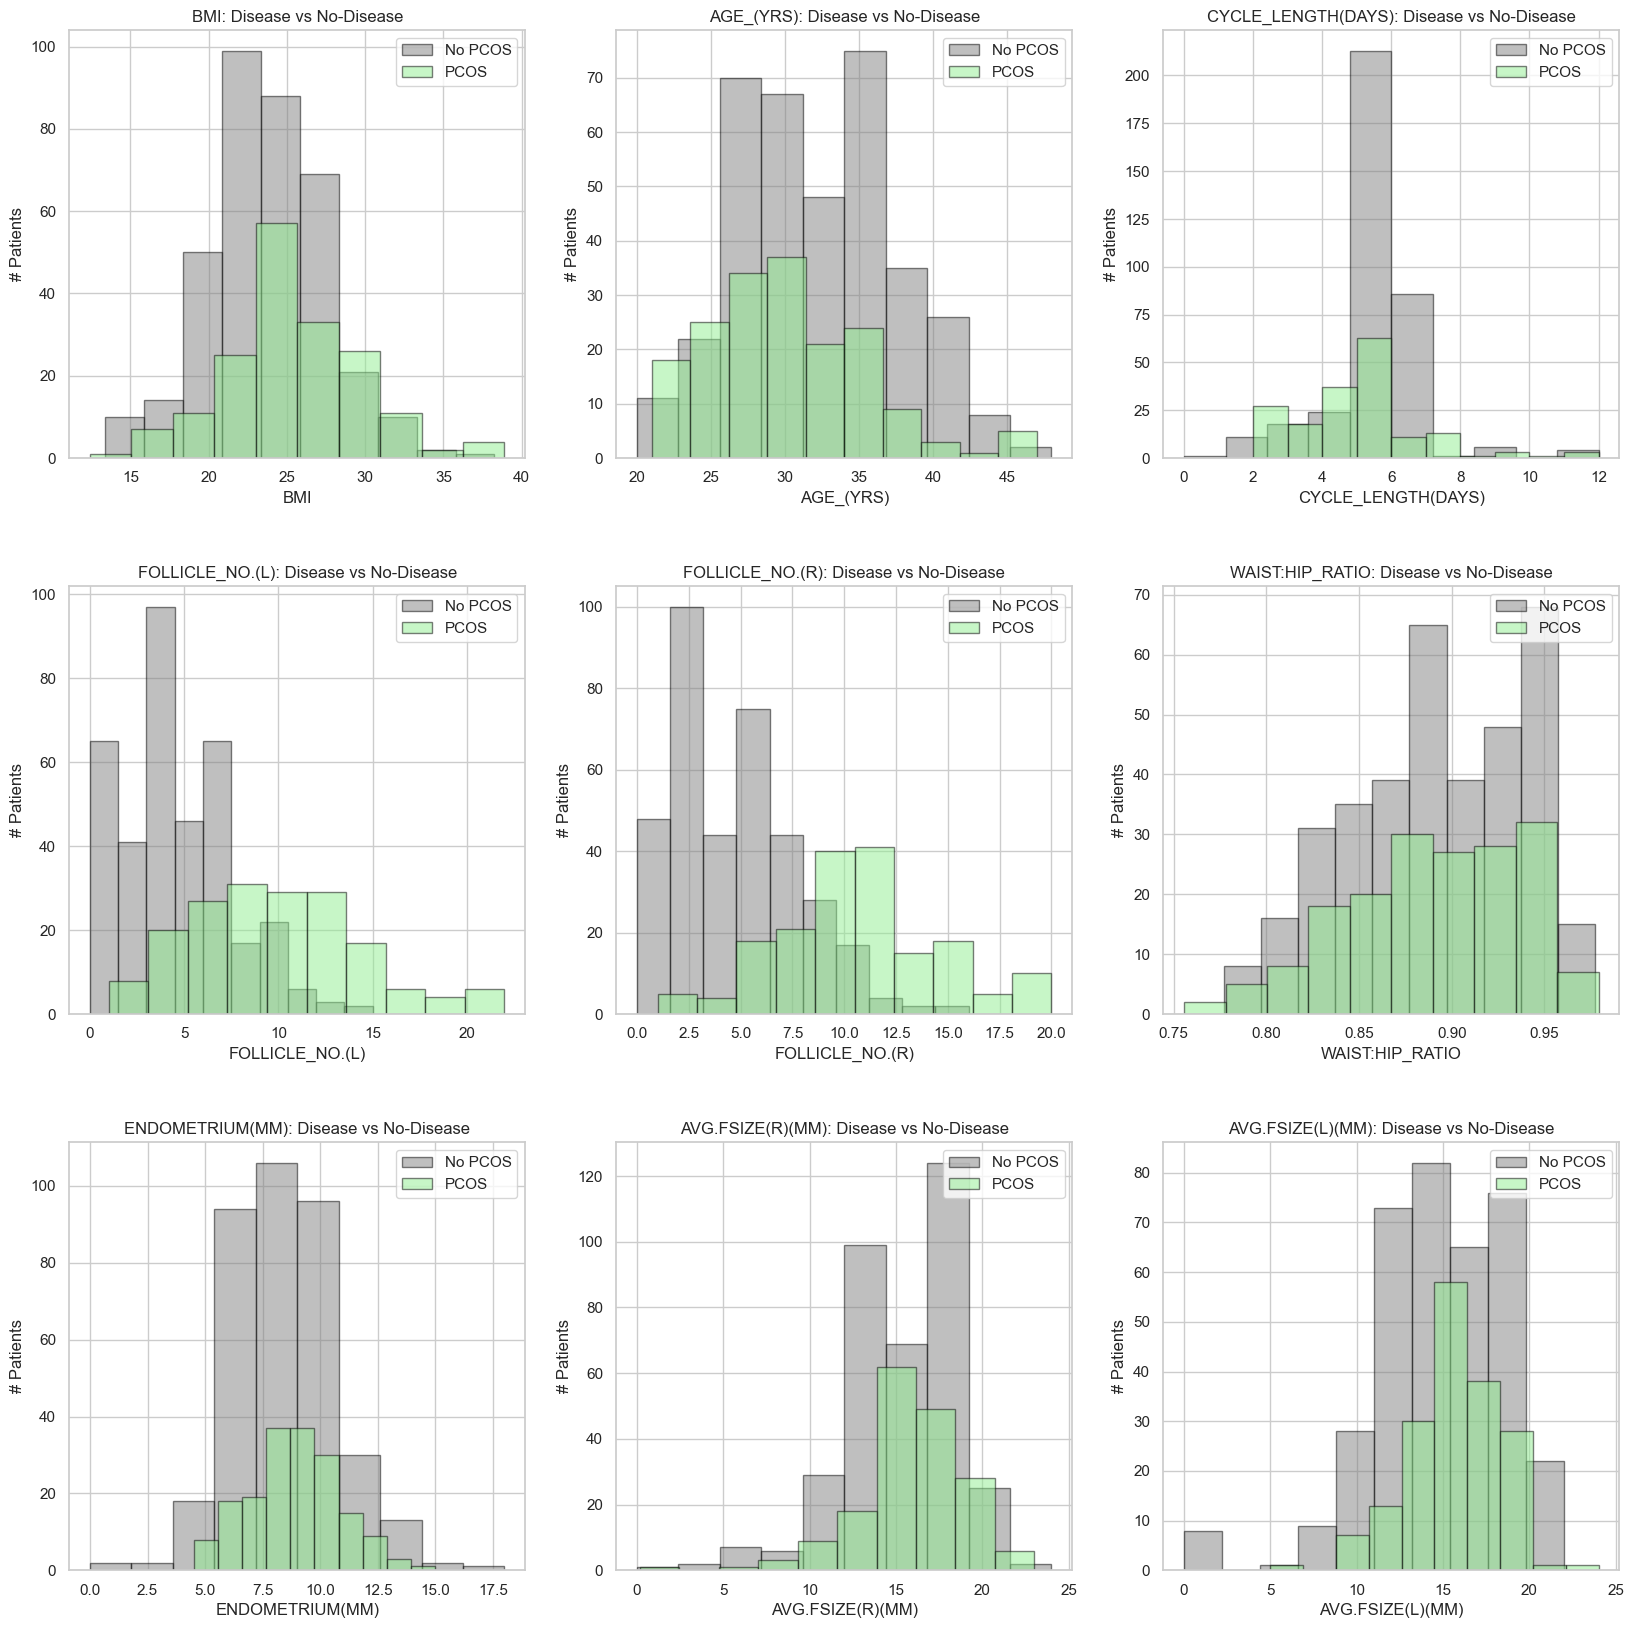

In [21]:

sns.set_style('whitegrid')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

cols = ['BMI','Age_(yrs)',"Cycle_length(days)",'Follicle_No.(L)','Follicle_No.(R)','Waist:Hip_Ratio','Endometrium(mm)','Avg.Fsize(R)(mm)','Avg.Fsize(L)(mm)']

for n in range(0,9):
    ax = fig.add_subplot(3,3,n+1)
    ax.hist(dummy_df[dummy_df['Class'] ==0][cols[n]], bins = 10, label ='No PCOS', alpha = .50,edgecolor= 'black',color ='grey')
    ax.hist(dummy_df[dummy_df['Class']==1][cols[n]], bins = 10, label = 'PCOS', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    ax.set_title(cols[n].upper()+': Disease vs No-Disease')
    ax.set_xlabel(cols[n].upper())
    ax.set_ylabel('# Patients')
    ax.legend(loc = 'upper right')
plt.savefig('histograms_by_class.png')

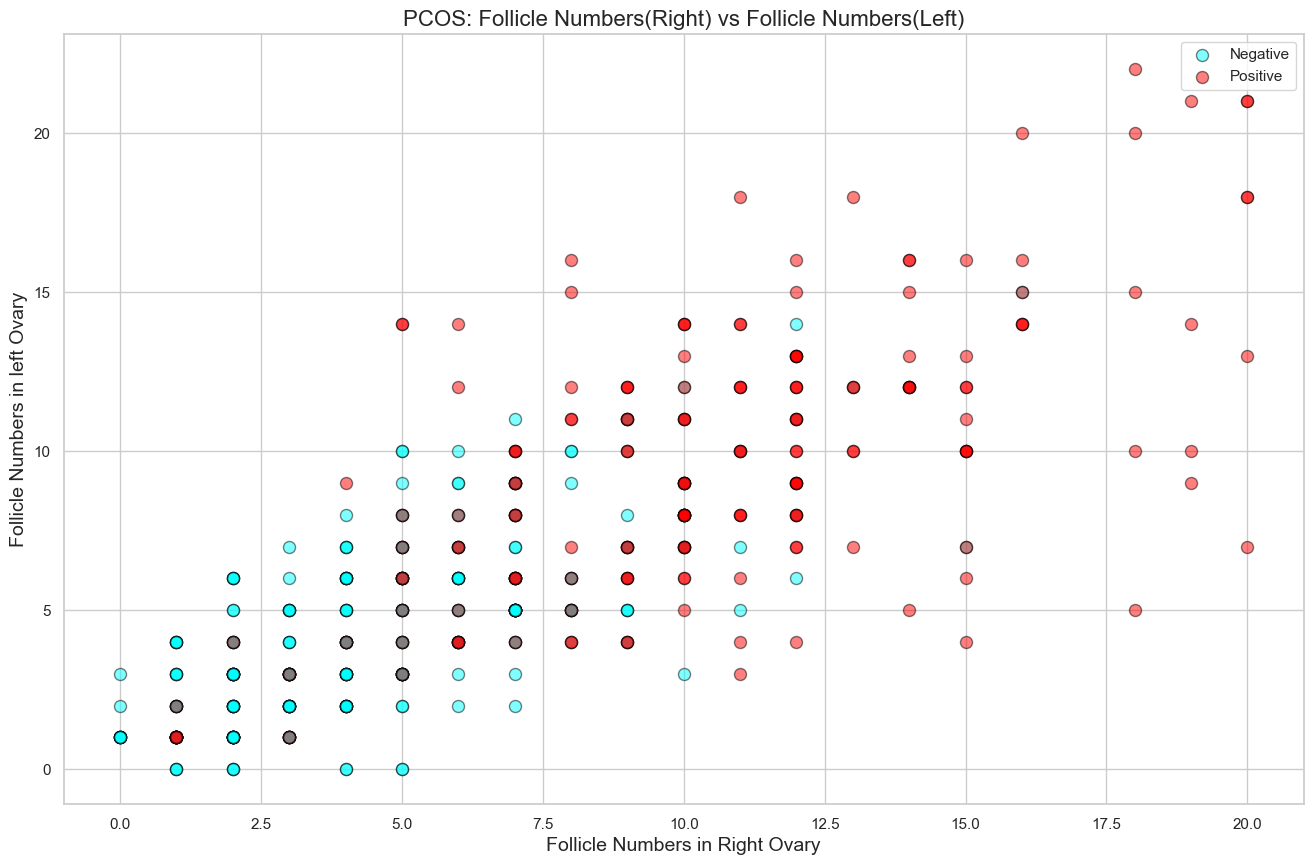

In [22]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==0]['Follicle_No.(L)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==1]['Follicle_No.(L)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Follicle Numbers in Right Ovary',fontsize=14)
plt.ylabel('Follicle Numbers in left Ovary',fontsize=14)
plt.title('PCOS: Follicle Numbers(Right) vs Follicle Numbers(Left)',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle_Numbers(Right)_vs_Follicle_Numbers(Left).png')

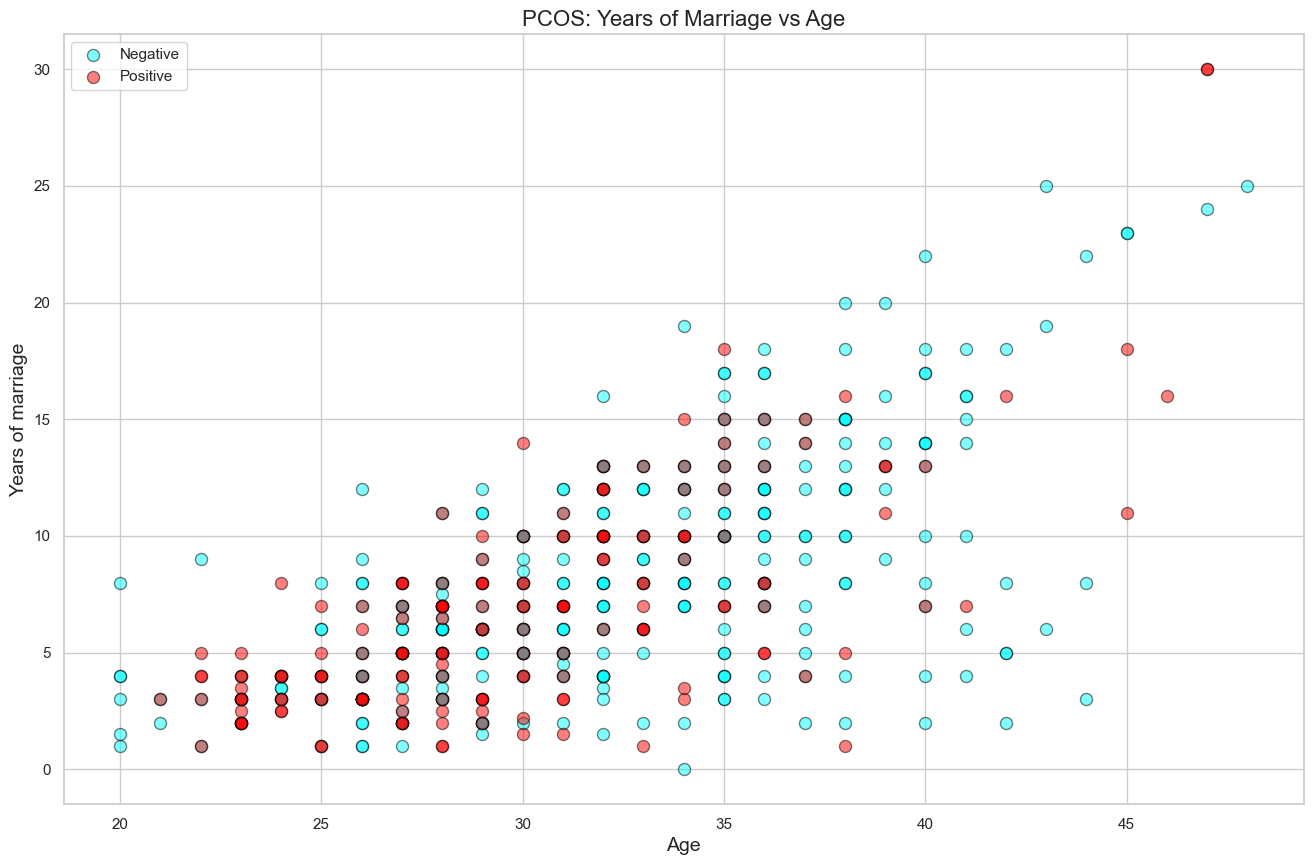

In [23]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Age_(yrs)'], y = dummy_df[dummy_df['Class']==0]['Marriage_Status_(Yrs)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Age_(yrs)'], y = dummy_df[dummy_df['Class']==1]['Marriage_Status_(Yrs)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Years of marriage',fontsize=14)
plt.title('PCOS: Years of Marriage vs Age',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Years_of_Marriage_vs_Age.png')

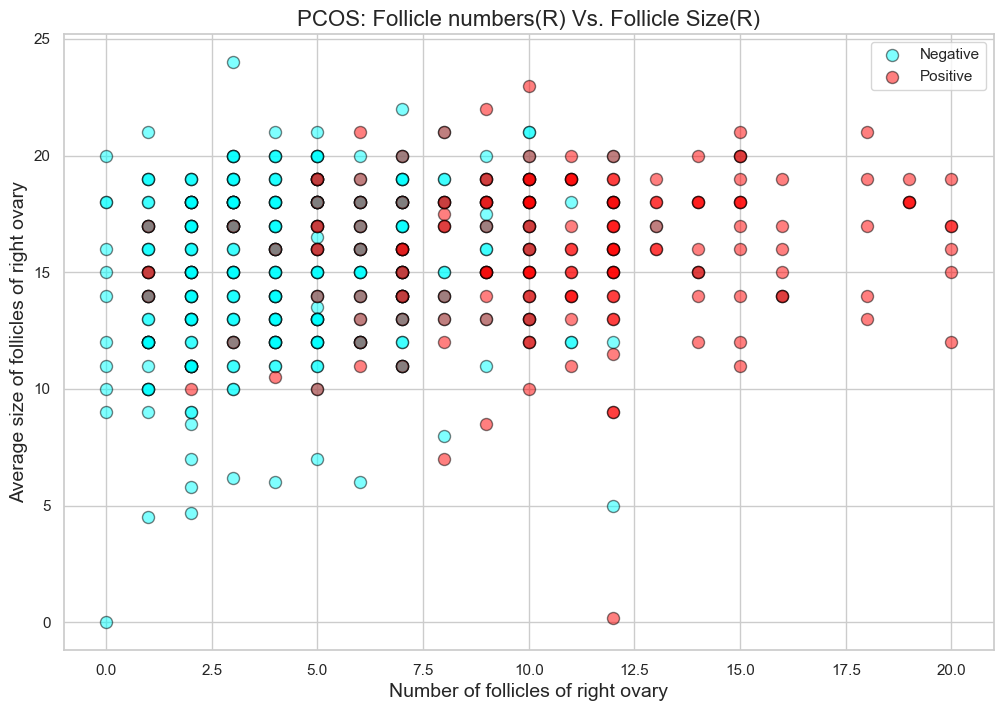

In [24]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==0]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==1]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Number of follicles of right ovary',fontsize=14)
plt.ylabel('Average size of follicles of right ovary',fontsize=14)
plt.title('PCOS: Follicle numbers(R) Vs. Follicle Size(R)',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle numbers(R) Vs. Follicle Size(R).png')

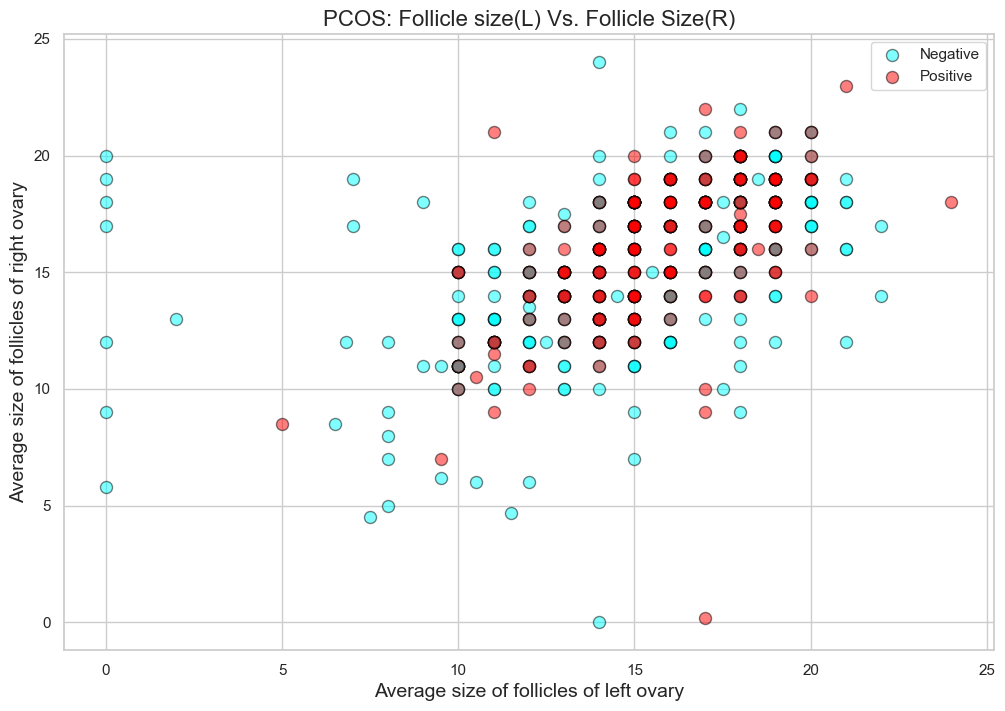

In [25]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Avg.Fsize(L)(mm)'], y = dummy_df[dummy_df['Class']==0]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Avg.Fsize(L)(mm)'], y = dummy_df[dummy_df['Class']==1]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Average size of follicles of left ovary', fontsize=14)
plt.ylabel('Average size of follicles of right ovary', fontsize=14)
plt.title('PCOS: Follicle size(L) Vs. Follicle Size(R)', fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle size(L) Vs. Follicle Size(R).png')

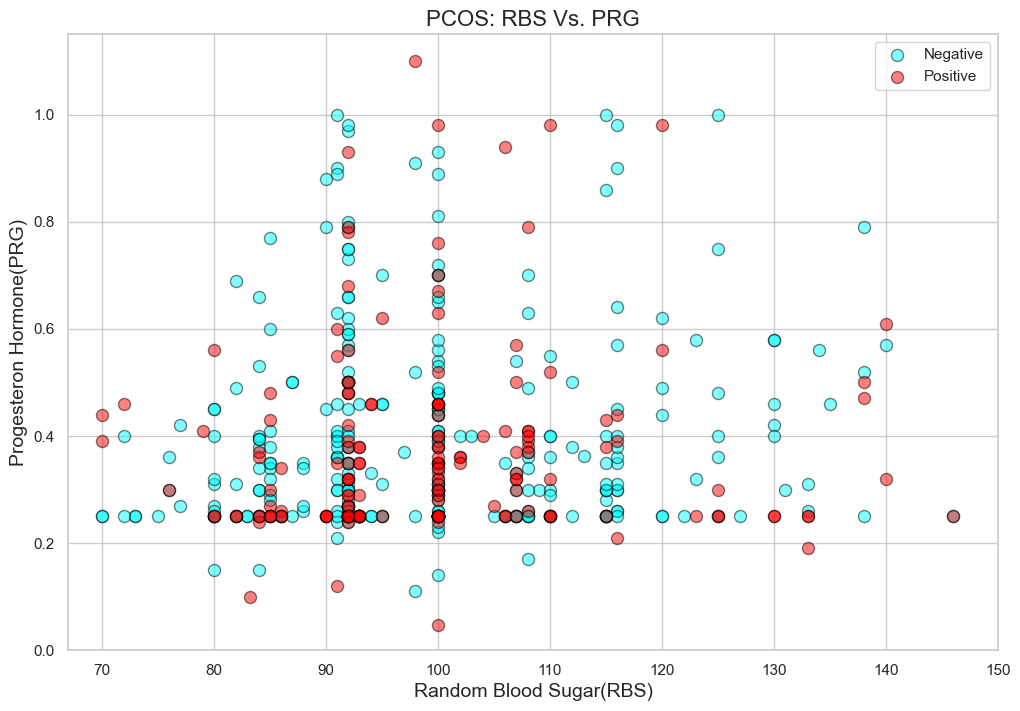

In [26]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['RBS(mg/dl)'], y = dummy_df[dummy_df['Class']==0]['PRG(ng/mL)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['RBS(mg/dl)'], y = dummy_df[dummy_df['Class']==1]['PRG(ng/mL)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlim(67,150)
plt.ylim(0,1.15)
plt.xlabel('Random Blood Sugar(RBS)', fontsize=14)
plt.ylabel('Progesteron Hormone(PRG)', fontsize=14)
plt.title('PCOS: RBS Vs. PRG', fontsize=16)
plt.legend()

#plt.show()
plt.savefig('RBS Vs. PRG.png')

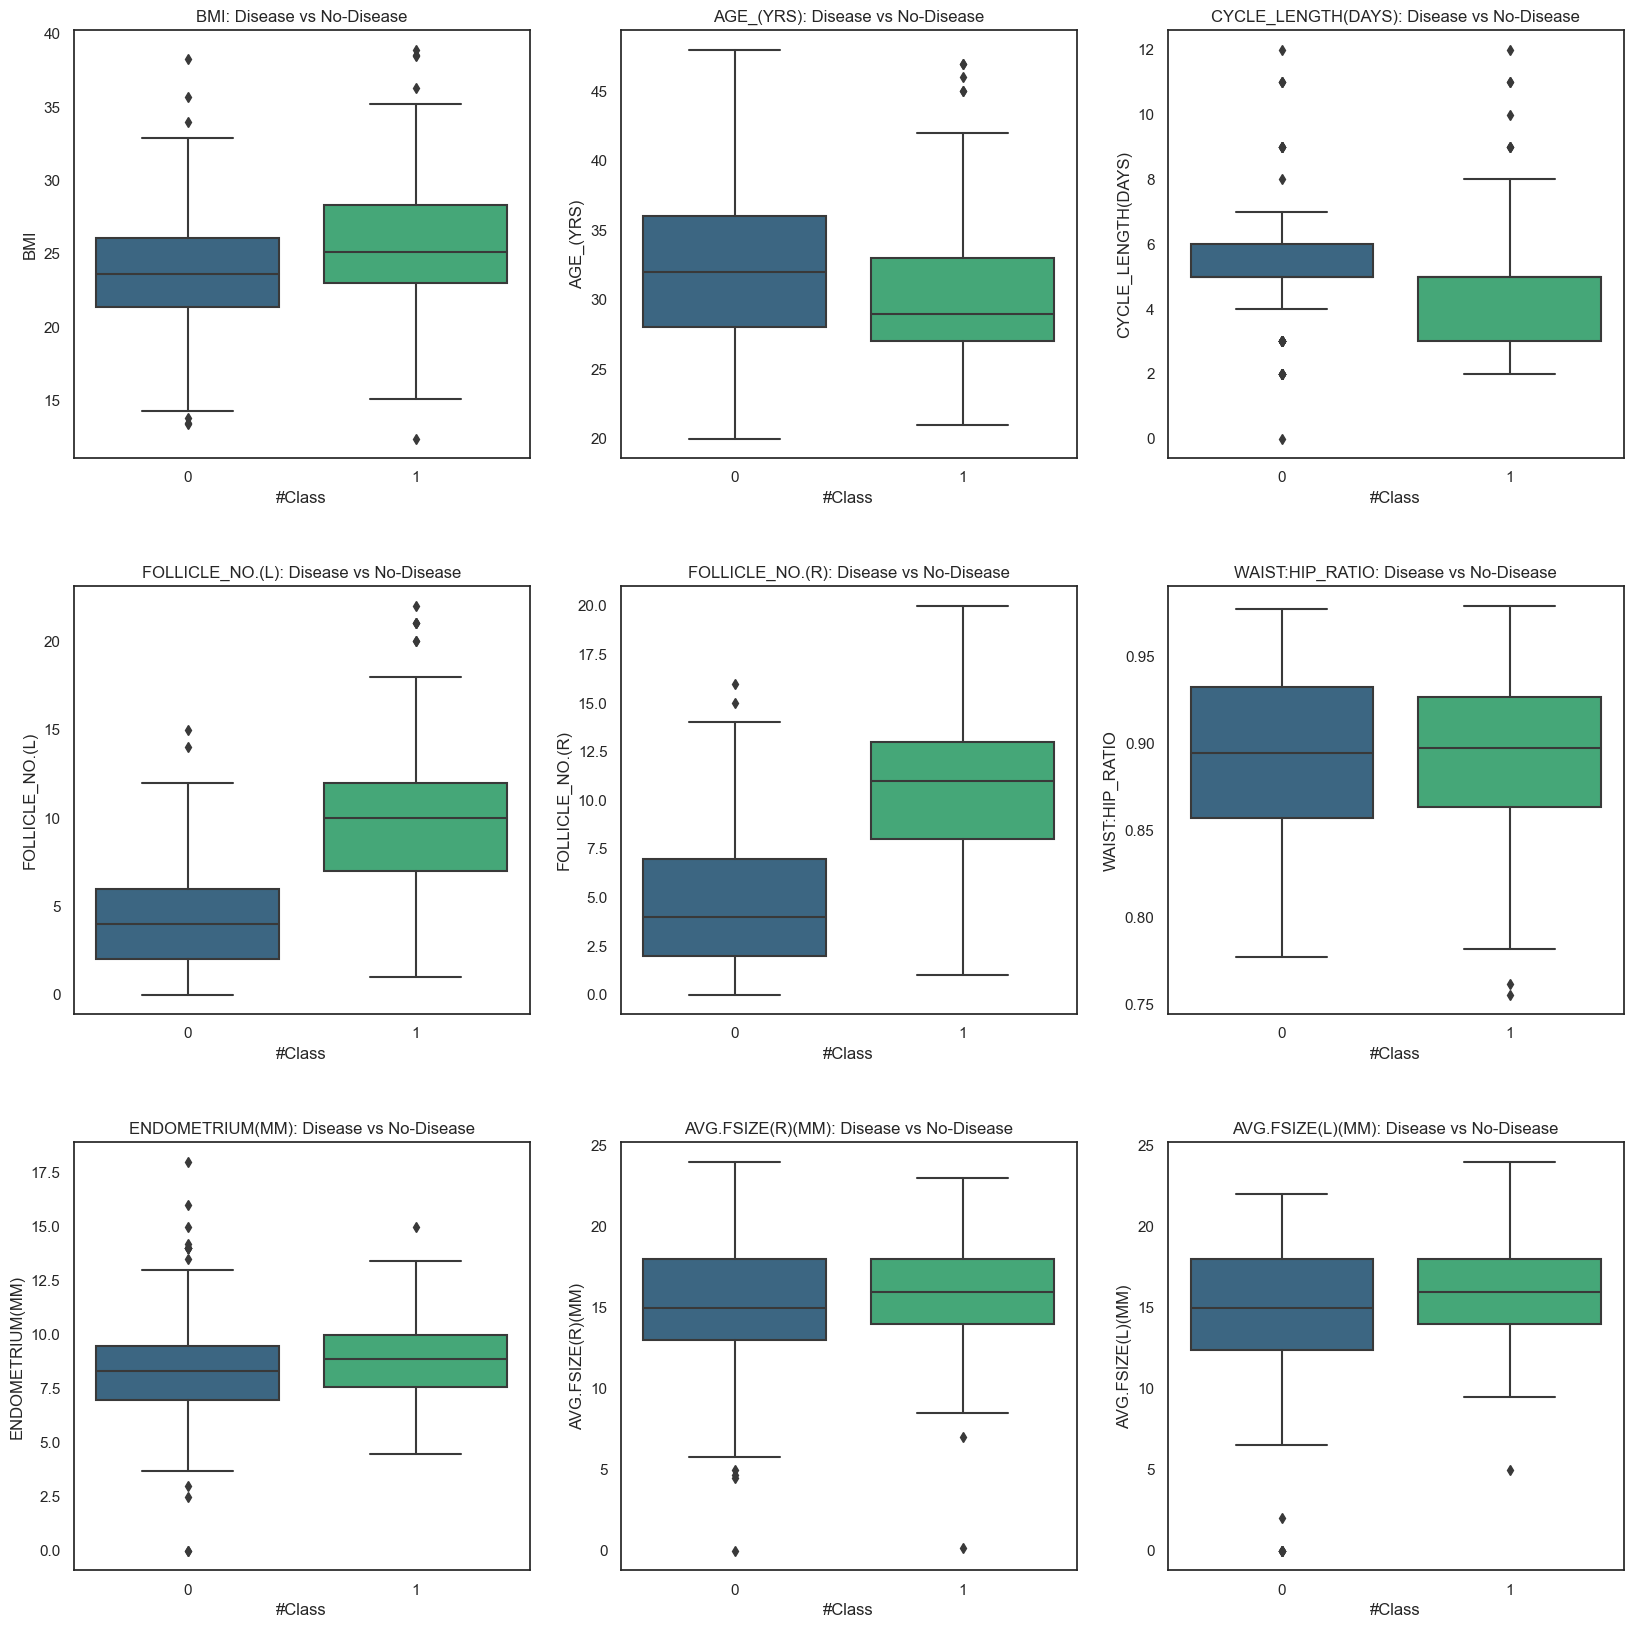

In [27]:

sns.set_style('white')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

cols = ['BMI','Age_(yrs)',"Cycle_length(days)",'Follicle_No.(L)','Follicle_No.(R)','Waist:Hip_Ratio','Endometrium(mm)','Avg.Fsize(R)(mm)','Avg.Fsize(L)(mm)']

for n in range(0,9):
    ax = fig.add_subplot(3,3,n+1)
    sns.boxplot(x='Class', y=cols[n], data=dummy_df,ax=ax, palette='viridis')
    #ax.hist(dummy_df[dummy_df['Class']==1][cols[n]], bins = 10, label = 'PCOS', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    plt.title(cols[n].upper()+': Disease vs No-Disease')
    plt.xlabel('#Class')
    plt.ylabel(cols[n].upper())
#plt.show()
    
plt.savefig('Boxplots.png')


In [28]:
cleaned_df['Blood_Group']

0       O+
1       O+
2       A+
3       B+
4       A+
      ... 
536    AB+
537     O+
538     B+
539     O+
540     B+
Name: Blood_Group, Length: 541, dtype: object

In [29]:
dummy_df['Blood_Group_Categories']=cleaned_df['Blood_Group']

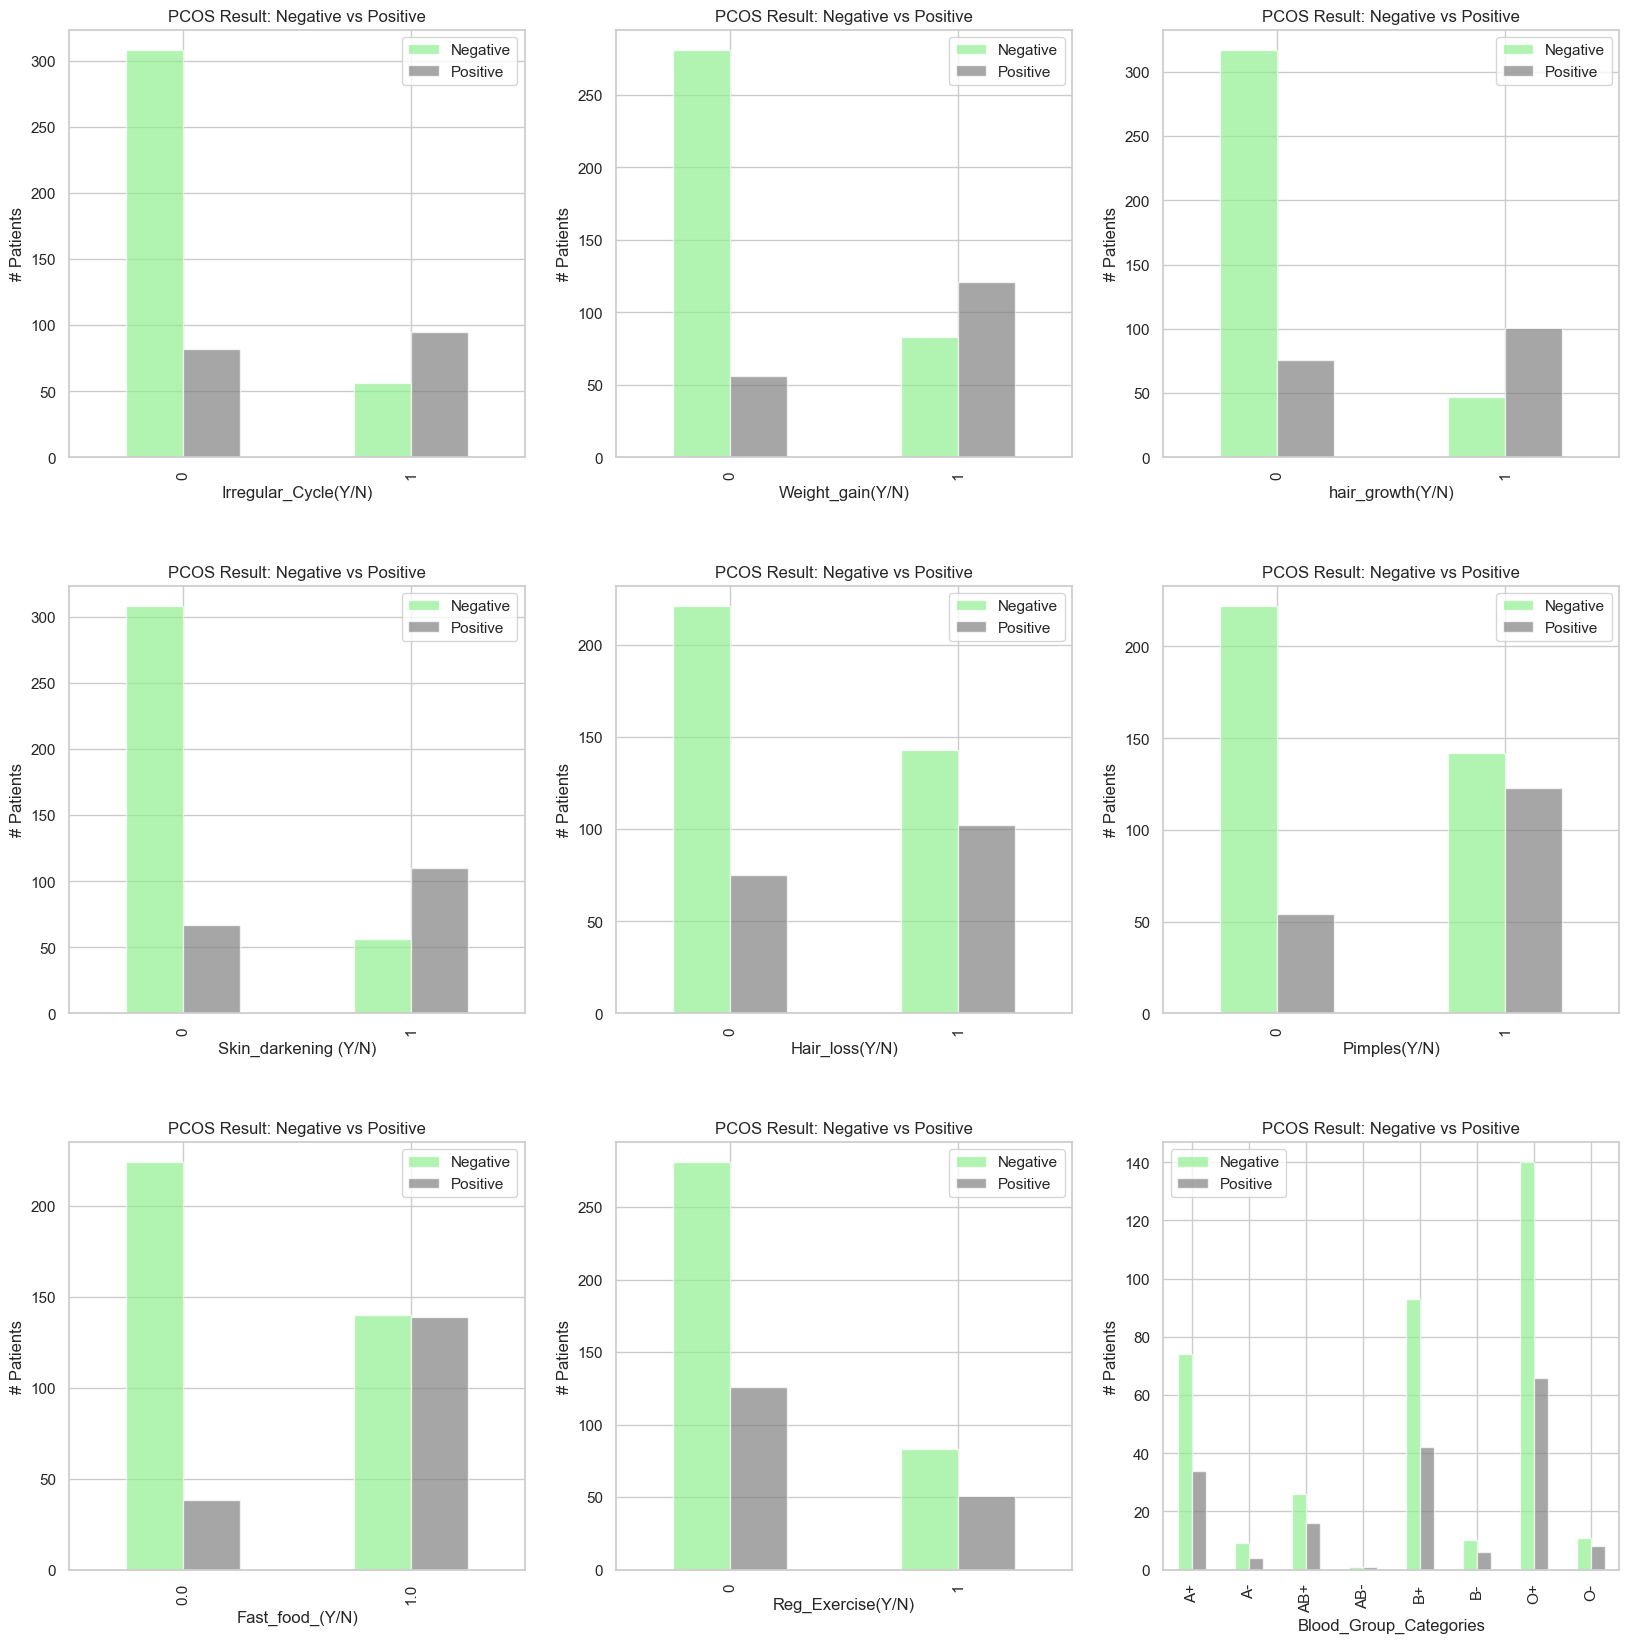

In [30]:
bin_cols= ['Irregular_Cycle(Y/N)','Weight_gain(Y/N)', 'hair_growth(Y/N)',
       'Skin_darkening (Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)',
       'Fast_food_(Y/N)', 'Reg_Exercise(Y/N)','Blood_Group_Categories']
sns.set_style('whitegrid')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

for n in range(0,9):
  ax = fig.add_subplot(3,3,n+1)
  sibsp = dummy_df.groupby([bin_cols[n],'Class'])[bin_cols[n]].count().unstack()
  p2 = sibsp.plot(kind = 'bar',color = ['lightgreen','grey'], alpha = .70,ax=ax)
  p2.set_title('PCOS Result: Negative vs Positive')
  p2.set_xlabel(bin_cols[n])
  p2.set_ylabel('# Patients')
  p2.legend(['Negative','Positive'])
#plt.show()
plt.savefig('Histograms_by_binary_class.png')

In [31]:
dummy_df.drop(columns=['Blood_Group_Categories'],inplace=True)


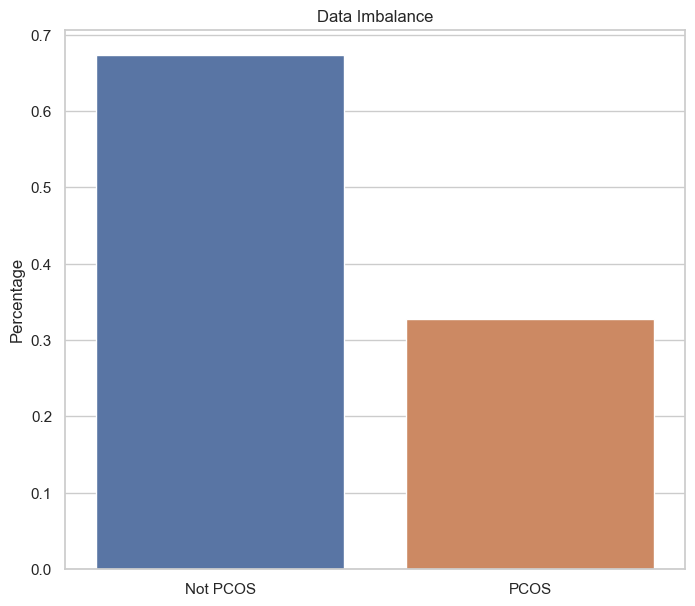

In [32]:
plt.figure(figsize=(8,7))
sns.barplot(y=dummy_df['Class'].value_counts(normalize=True), x = ['Not PCOS', 'PCOS'])
plt.ylabel('Percentage')
plt.title('Data Imbalance')
#plt.show()
plt.savefig('Data Imbalance.png')

# **Feature Selection**

Since we have BMI, FSH/LH and Hip:Waist ratio, therefore we can drop these six solumns below as both sets of columns convey similar information. 

In [33]:
dummy_df.drop(columns=['Weight_(Kg)','Height(m)','FSH(mIU/mL)','LH(mIU/mL)','Hip(inch)','Waist(inch)'],inplace=True)

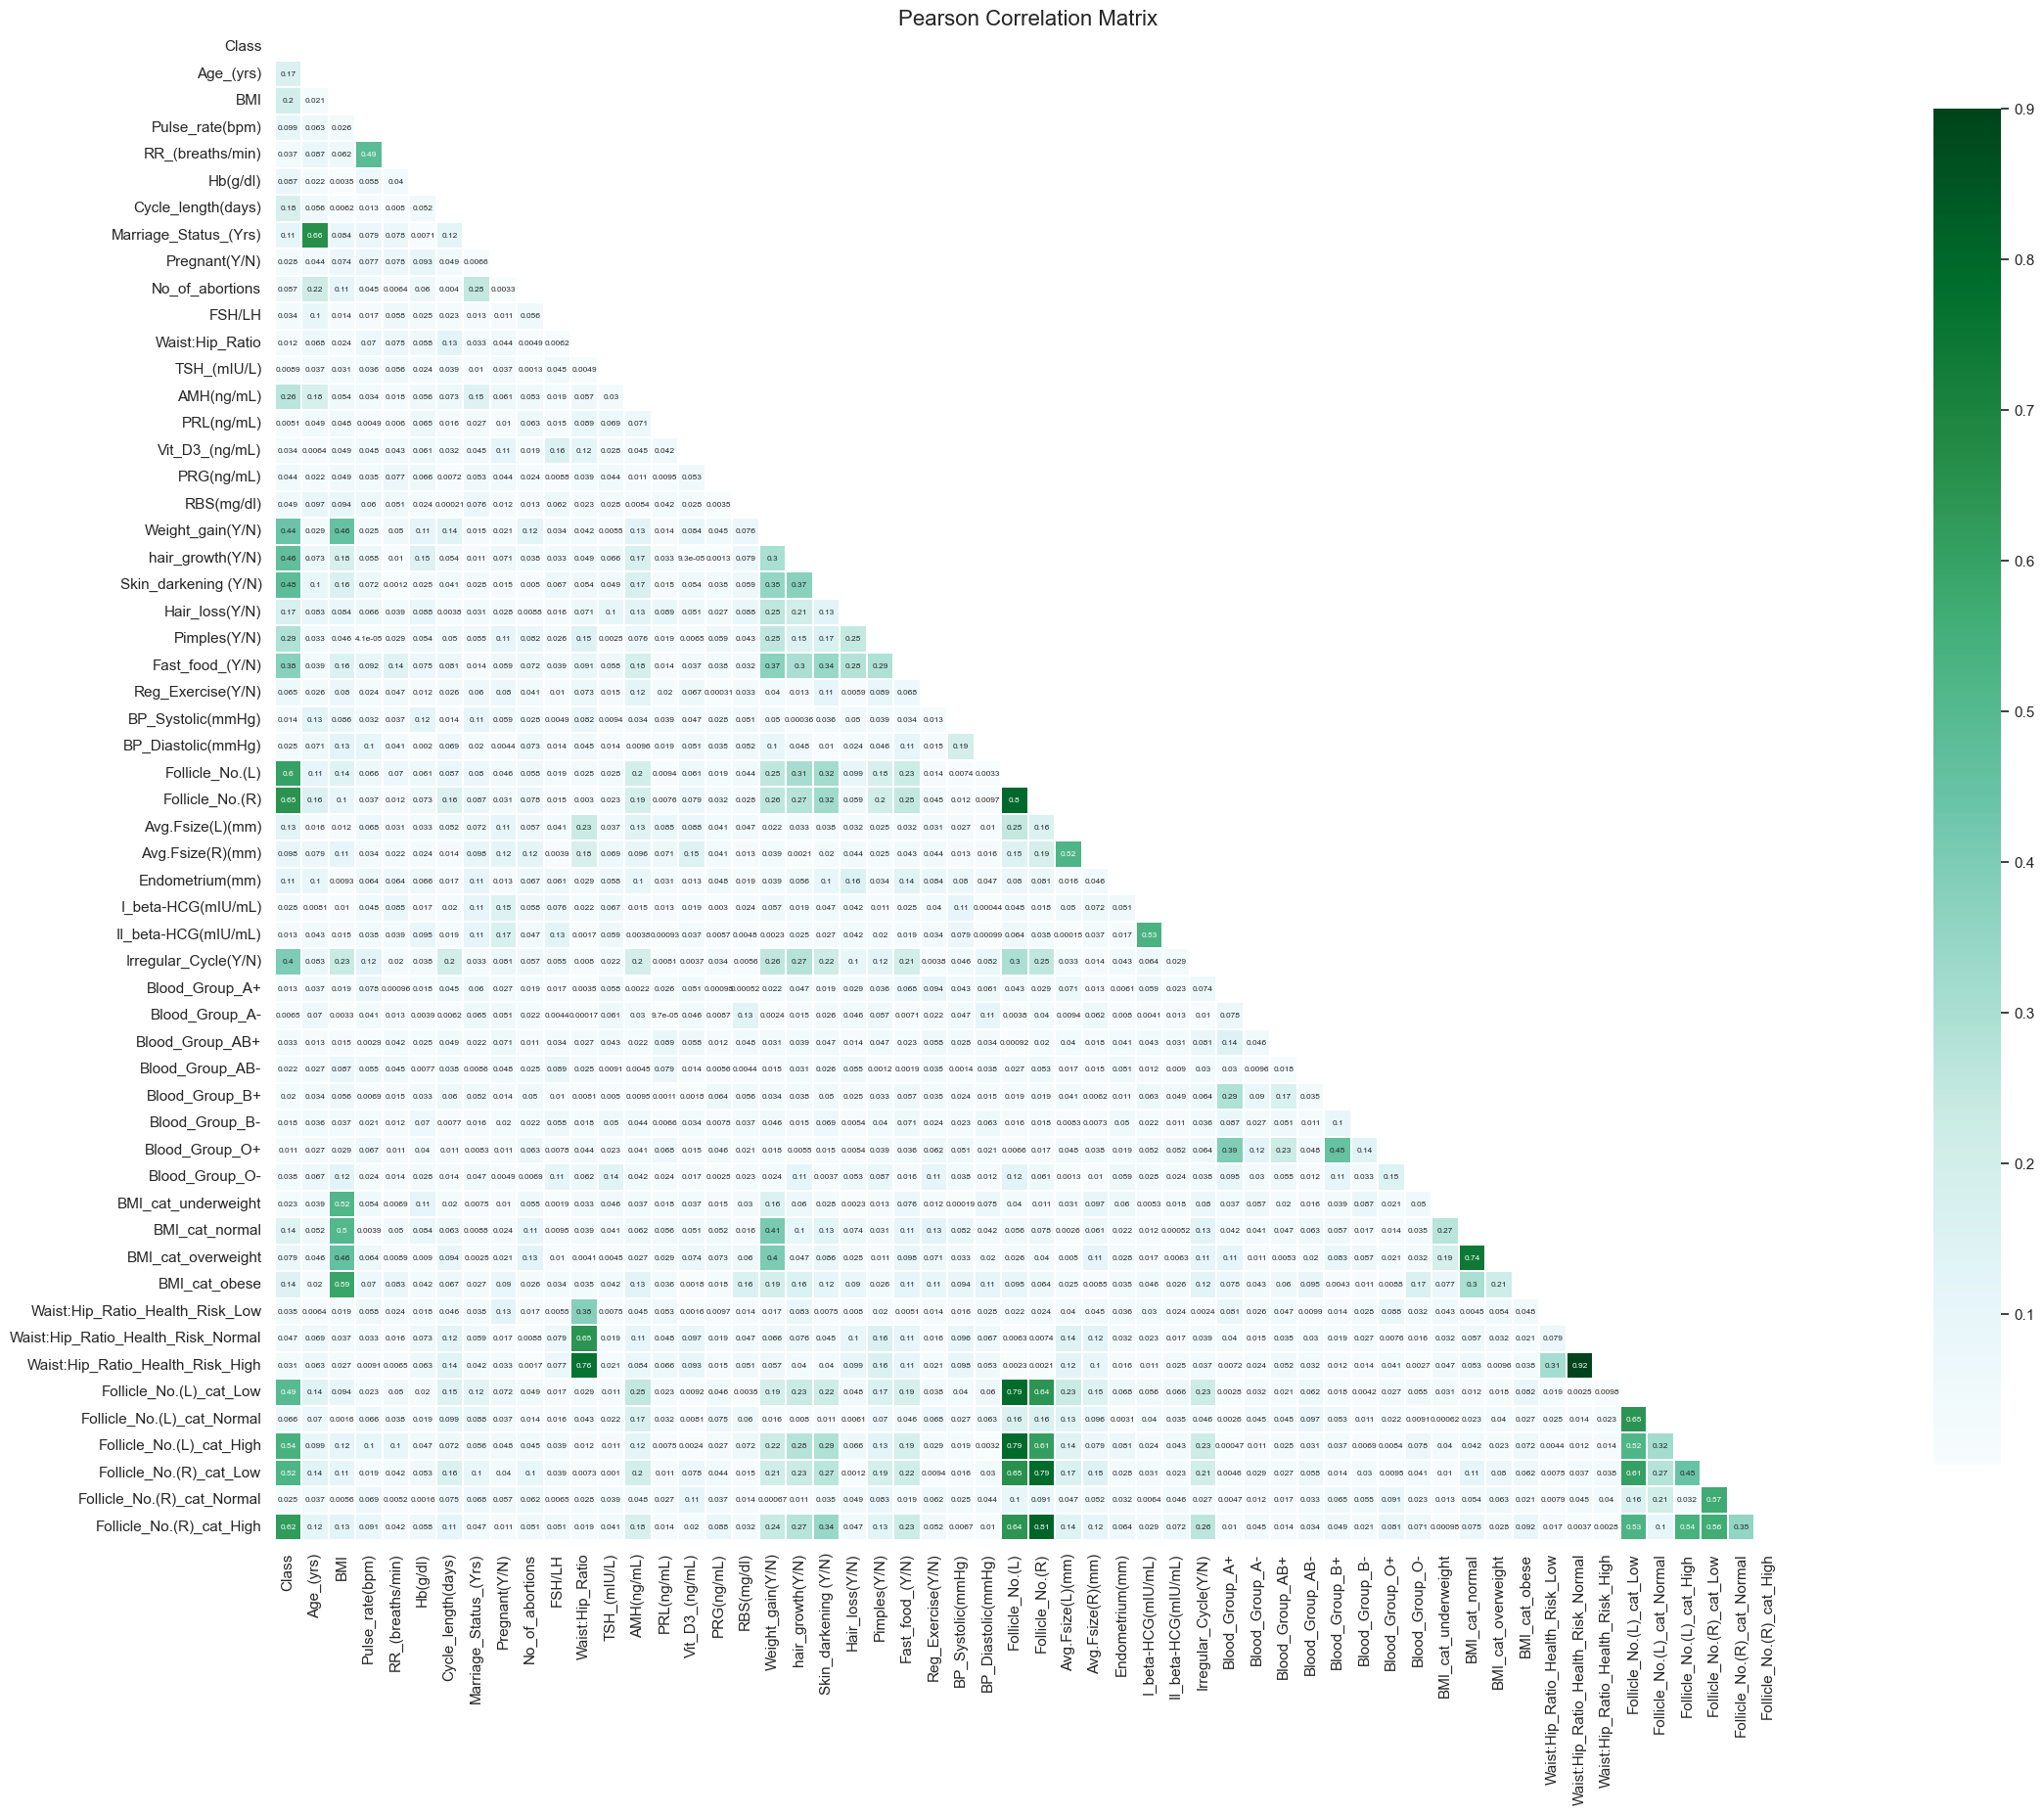

In [34]:

# check the columns for multi co-linearity
mask = np.zeros_like(dummy_df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True #mask variable creates a boolean matrix.with True values in the upper triangular part of the matrix and False values in the lower triangular part. 

f, ax = plt.subplots(figsize=(40, 20))
plt.title('Pearson Correlation Matrix',fontsize=16)

sns.heatmap(dummy_df.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":6},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('All_Correlation.png')

In [35]:
#Identifying Features which have more than 0.25 correlation with PCOS(Y/N)

corr_features=dummy_df.corrwith(dummy_df["Class"]).abs().sort_values(ascending=False)
#features with correlation more than 0.25
corr_features=corr_features[corr_features>0.25].index
corr_features

Index(['Class', 'Follicle_No.(R)', 'Follicle_No.(R)_cat_High',
       'Follicle_No.(L)', 'Follicle_No.(L)_cat_High',
       'Follicle_No.(R)_cat_Low', 'Follicle_No.(L)_cat_Low',
       'Skin_darkening (Y/N)', 'hair_growth(Y/N)', 'Weight_gain(Y/N)',
       'Irregular_Cycle(Y/N)', 'Fast_food_(Y/N)', 'Pimples(Y/N)',
       'AMH(ng/mL)'],
      dtype='object')

In [36]:
df=dummy_df[corr_features]
df.head()

,Class,Follicle_No.(R),Follicle_No.(R)_cat_High,Follicle_No.(L),Follicle_No.(L)_cat_High,Follicle_No.(R)_cat_Low,Follicle_No.(L)_cat_Low,Skin_darkening (Y/N),hair_growth(Y/N),Weight_gain(Y/N),Irregular_Cycle(Y/N),Fast_food_(Y/N),Pimples(Y/N),AMH(ng/mL)
0,0,3,0,3,0,1,1,0,0,0,0,1.0,0,2.07
1,0,5,0,3,0,1,1,0,0,0,0,0.0,0,1.53
2,1,15,1,13,1,0,0,0,0,0,0,1.0,1,6.63
3,0,2,0,2,0,1,1,0,0,0,0,0.0,0,1.22
4,0,4,0,3,0,1,1,0,0,0,0,0.0,0,2.26


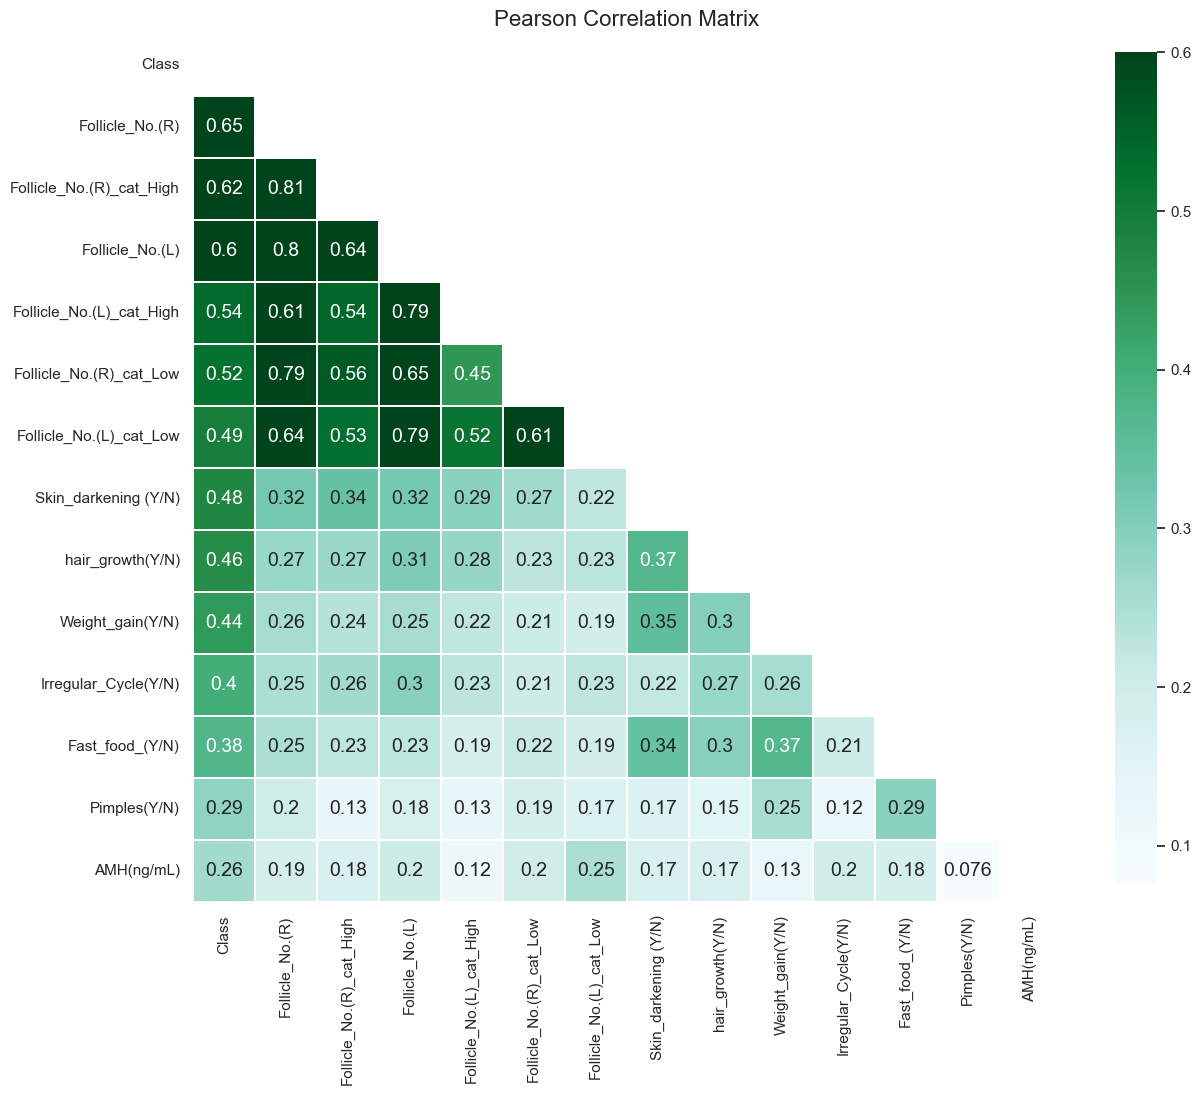

In [37]:
# check the columns for multi co-linearity
mask = np.zeros_like(df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(14,12))
plt.title('Pearson Correlation Matrix',fontsize=16)
#sns.heatmap(dummy_df.corr(), annot=True)
sns.heatmap(df.corr().abs(),linewidths=0.25,vmax=0.6,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":14},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('Correlation_With_Engineered_Feature.png')

In [38]:
df.drop(columns=['Follicle_No.(R)_cat_High','Follicle_No.(L)_cat_High','Follicle_No.(R)_cat_Low','Follicle_No.(L)_cat_Low'],inplace=True)

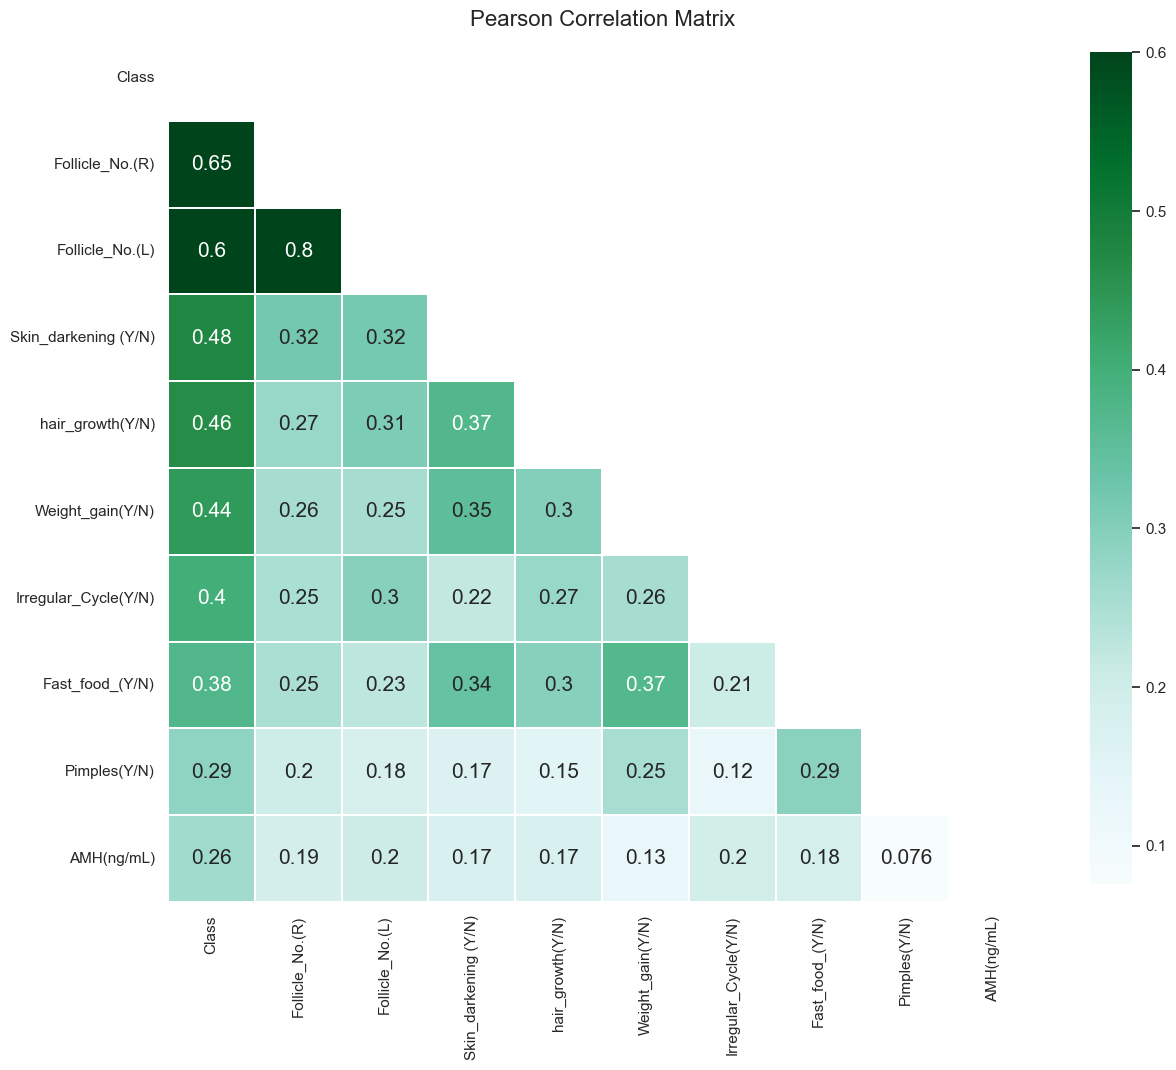

In [39]:

# check the columns for multi co-linearity
mask = np.zeros_like(df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(14,12))
plt.title('Pearson Correlation Matrix',fontsize=16)
#sns.heatmap(dummy_df.corr(), annot=True)
sns.heatmap(df.corr().abs(),linewidths=0.25,vmax=0.6,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('Final_Correlation.png')

In [40]:
df.to_csv('Cleaned_PCOS_Final.csv',index=False)  #saved the dataframe as a CSV file

In [41]:
#Separated the features and target into two different variables for later model fitting purporses
model_target=df.Class
model_feat=df.drop('Class', axis=1)
print(model_target.shape)
print(model_feat.shape)

(541,)
(541, 9)


# **Modelling Process**

## **Normalization**

Next we have to standardize the data frame features for modelling purposes because the values can't be on different scale.

In [42]:
# normalized = value - mean / standard deviation
norm_df = (df - df.mean())/ df.std()
norm_df['Class'] = df['Class']  # plug back in the original values for the target

In [43]:
norm_df.head()

,Class,Follicle_No.(R),Follicle_No.(L),Skin_darkening (Y/N),hair_growth(Y/N),Weight_gain(Y/N),Irregular_Cycle(Y/N),Fast_food_(Y/N),Pimples(Y/N),AMH(ng/mL)
0,0,-0.820711,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,0.968159,-0.978964,-0.604184
1,0,-0.369945,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.696072
2,1,1.883886,1.624529,-0.664717,-0.613102,-0.777317,-0.621662,0.968159,1.019600,0.171756
3,0,-1.046094,-0.976378,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.748822
4,0,-0.595328,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.571853


## **Train Test Split**

In [44]:
test_set=norm_df[433:]  # Validation Set
train_set=norm_df[0:433]  #train test set


In [45]:
train_set['Class'].value_counts(normalize=True)
test_set['Class'].value_counts(normalize=True)


0    0.638889
1    0.361111
Name: Class, dtype: float64

In [46]:
test_target=test_set.Class  # separated the target column into a series
test_features=test_set.drop('Class', axis=1)  # created a feature matrix
print(test_target.shape)
print(test_features.shape)

(108,)
(108, 9)


In [47]:
target=train_set.Class  # separated the target column into a series
features=train_set.drop('Class', axis=1)  # created a feature matrix
print(target.shape)
print(features.shape)


(433,)
(433, 9)


In [48]:
# split the train data further into a train and a test set in 8:2 ratio
from sklearn.model_selection import train_test_split  #

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=23)

In [49]:
#checked the dimension of the train test splits to make sure they are correct
print("Train features dimension: ", X_train.shape)
print("Train target dimension: ", y_train.shape)
print("Test features dimension: ", X_test.shape)
print("Test target dimension: ", y_test.shape)

Train features dimension:  (346, 9)
Train target dimension:  (346,)
Test features dimension:  (87, 9)
Test target dimension:  (87,)


Before OverSampling, counts of label '1': 104
Before OverSampling, counts of label '0': 242 



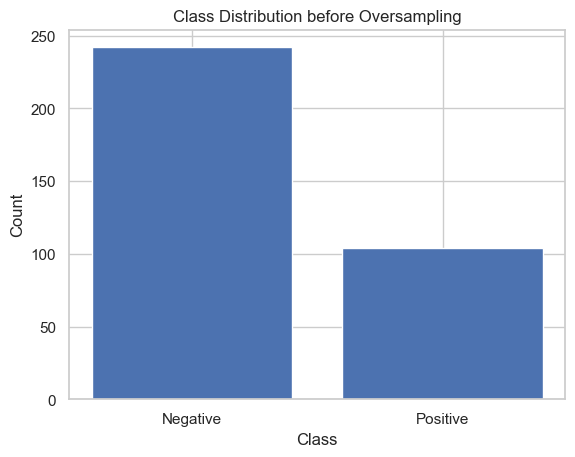

In [50]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))  # Number of positive class
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))  # Number of negative class
# Count the number of samples in each class
class_counts = [sum(y_train==0), sum(y_train==1)]

# Create a bar plot
plt.bar([0, 1], class_counts)

# Add labels and title
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution before Oversampling')

# Show the plot
plt.show()

In [51]:
# Count the number of samples in each class before oversampling
class_counts = [sum(y_train==0), sum(y_train==1)]

# Calculate the percentage of each class before oversampling
class_perc = np.array(class_counts) / len(y_train) * 100

# Calculate the overall imbalance percentage
imbalance_percentage = abs(class_perc[0] - class_perc[1])

print(f'Overall imbalance percentage: {imbalance_percentage:.2f}%')

Overall imbalance percentage: 39.88%


In order to tackle the class imbalance, we have to oversample the minority class which is positive. For this we used SMOTE technique (Synthetic Minority Oversampling Technique) which will make the minority class equivalent to the majority class.
his can cause issues for classification models, as they may become biased towards the majority class and have lower accuracy in predicting the minority class. Oversampling is one technique used to address class imbalance, which involves creating synthetic data points for the minority class to balance out the dataset.

In [52]:
from imblearn.over_sampling import SMOTE

SMOTE is a popular oversampling technique in machine learning. It stands for Synthetic Minority Over-sampling Technique. SMOTE works by creating synthetic samples from the minority class instead of creating copies. It randomly picks a point from the minority class and computes the k-nearest neighbors for this point. The synthetic samples are generated by interpolating between the chosen point and its k-nearest neighbors. The number of synthetic samples generated is customizable. This technique is widely used to balance imbalanced classes in binary classification problems.

In [53]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())  # Implemented the oversampling

After OverSampling, the shape of train_X: (484, 9)
After OverSampling, the shape of train_y: (484,) 

After OverSampling, counts of label '1': 242
After OverSampling, counts of label '0': 242


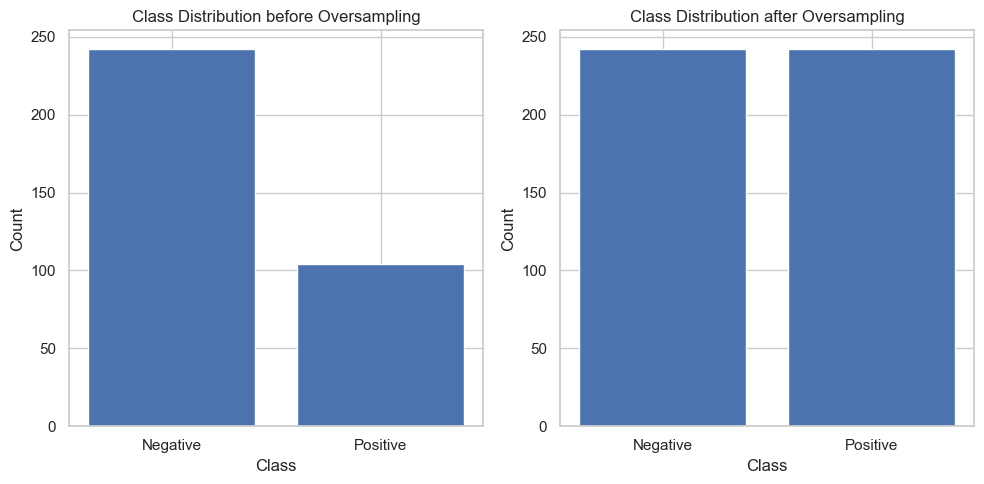

In [54]:
#Checked the shape of the oversampled train features and class
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
#Checked the value count of Positive and negative classes after SMOTE Oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
import matplotlib.pyplot as plt

# Count the number of samples in each class before oversampling
class_counts_before = [sum(y_train==0), sum(y_train==1)]

# Count the number of samples in each class after oversampling
class_counts_after = [sum(y_train_res==0), sum(y_train_res==1)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create bar plots for class distribution before and after oversampling
ax1.bar([0, 1], class_counts_before)
ax2.bar([0, 1], class_counts_after)

# Add labels and titles
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Negative', 'Positive'])
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title('Class Distribution before Oversampling')

ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Negative', 'Positive'])
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.set_title('Class Distribution after Oversampling')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


In [55]:
#from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler object
#rus = RandomUnderSampler(random_state=2)

# Resample the training data using random undersampling
#X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Print the shape of the undersampled train features and class
#print('After Random Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
#print('After Random Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# Print the value count of positive and negative classes after random undersampling
#print("After Random Undersampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After Random Undersampling, counts of label '0': {}".format(sum(y_train_res==0)))

#import matplotlib.pyplot as plt

# Count the number of samples in each class before undersampling
#class_counts_before = [sum(y_train==0), sum(y_train==1)]

# Count the number of samples in each class after undersampling

#class_counts_after = [sum(y_train_res==0), sum(y_train_res==1)]

# Create subplots
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create bar plots for class distribution before and after undersampling
#ax1.bar([0, 1], class_counts_before)
#ax2.bar([0, 1], class_counts_after)

# Add labels and titles
#ax1.set_xticks([0, 1])
#ax1.set_xticklabels(['Negative', 'Positive'])
#ax1.set_xlabel('Class')
#ax1.set_ylabel('Count')
#ax1.set_title('Class Distribution before Undersampling')

#ax2.set_xticks([0, 1])
#ax2.set_xticklabels(['Negative', 'Positive'])
#ax2.set_xlabel('Class')
#ax2.set_ylabel('Count')
#ax2.set_title('Class Distribution after Undersampling')

# Adjust spacing between subplots
#fig.tight_layout()

# Show the plots
#plt.show()


For modelling purposes, we will implement GridSearchCV to find the best parameters for each algorithm.

# **Logistic Regression** 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score  # imported evaluation metrics

In [57]:
lr = LogisticRegression()  # instantiate the model object
#'newton-cg', 'lbfgs', 'liblinear'', 'sag', 'saga'
param_dict={'solver':[ 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1,0.5, 0.6, 0.7], 
           'penalty': ['l1', 'l2', 'elasticnet', 'none']}  # set parameters to be searched through GridSearch

#create the instance of GridSearchCV using the recall metric for our scoring. 
grid_tree= GridSearchCV(lr, param_dict, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [58]:
#fit the Gridsearch to our data
grid_tree.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.6, 0.7],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [59]:

print(grid_tree.best_score_)  #  will output the best accuracy score obtained by GridSearchCV

print(grid_tree.best_params_)  #  will output the combination of hyperparameters that resulted in the best accuracy score.

print(grid_tree.best_estimator_)  # output the trained logistic regression model with the best hyperparameters found during GridSearchCV.

0.9153135738831615
{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=0.1, penalty='none')


C=0.1 is one of the hyperparameters of the logistic regression model. It controls the inverse of the regularization strength. A small value of C means a high regularization strength, which reduces the influence of the individual features and helps prevent overfitting. In this case, the grid search has determined that C=0.1 is the best value for this hyperparameter.

In [60]:

train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.925
Test Accuracy: 0.954 

Train Recall: 0.904
Test Recall: 0.941 

Test F1: 0.941
Test Precision: 0.941


In [61]:
logreg= grid_tree.best_estimator_

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.94      0.94      0.94        34

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87

Confusion Matrix: 
 [[51  2]
 [ 2 32]]


In [63]:
recalls = {'Logistic Regression': recall_score(y_test, y_pred )}
accuracies= {'Logistic Regression': accuracy_score(y_test, y_pred )}
f1= {'Logistic Regression': f1_score(y_test, y_pred)}
precisions= {'Logistic Regression': precision_score(y_test, y_pred )}

In [64]:
recalls

{'Logistic Regression': 0.9411764705882353}

In [65]:
accuracies

{'Logistic Regression': 0.9540229885057471}

In [66]:
f1

{'Logistic Regression': 0.9411764705882353}

In [67]:
precisions

{'Logistic Regression': 0.9411764705882353}

In [68]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Logistic Regression', fontsize=20)

Confusion Matrix, without normalization
[[51  2]
 [ 2 32]]


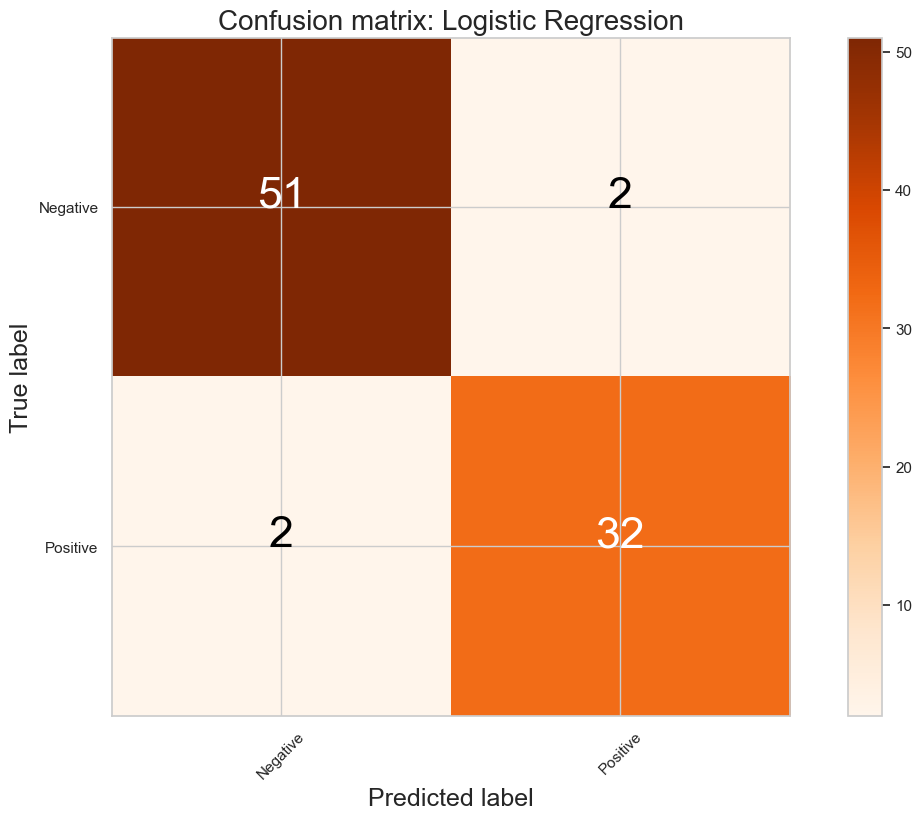

In [70]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Logreg.png')

In [71]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

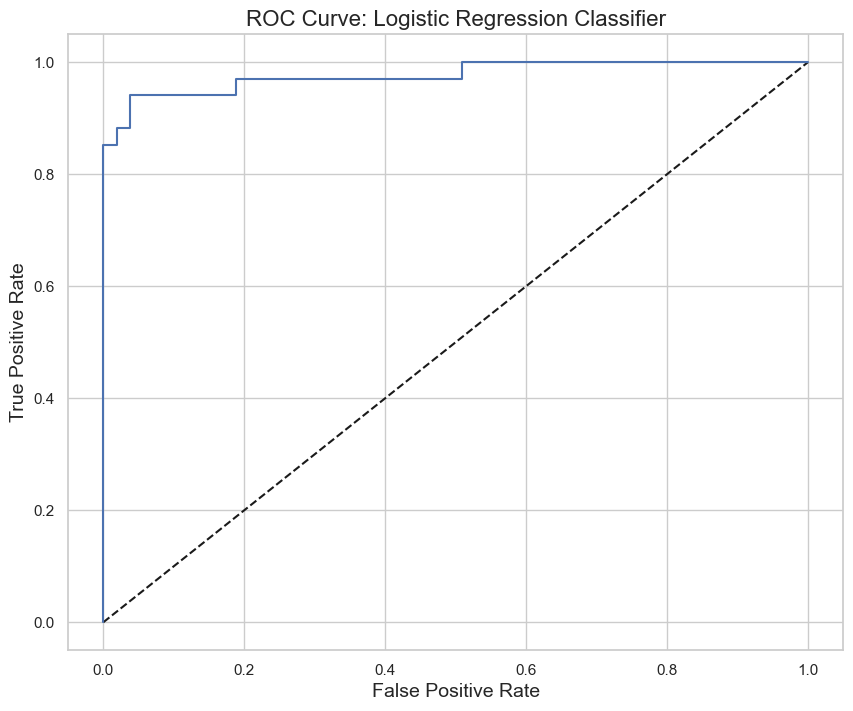

In [72]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve: Logistic Regression Classifier', fontsize=16)
#plt.show()
plt.savefig('ROC Curve: Logistic Regression Classifier.png')

In [73]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Logistic Regression Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Logistic Regression Classifier: 0.977


In [74]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of Logistic Regression Classifier: %.3f"%cross_val_score(logreg, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of Logistic Regression Classifier: 0.968


In [75]:
lr_coefs = pd.DataFrame(data = grid_tree.best_estimator_.coef_[0], index = X_test.columns, columns= ['coef'])
sort_coef= lr_coefs.sort_values(by='coef', ascending=True)

 In this case, an AUC of 0.967 indicates that the Logistic Regression Classifier is a very good classifier for the given dataset.

lr_coefs = pd.DataFrame(data = grid_tree.best_estimator_.coef_[0], index = X_test.columns, columns= ['coef'])
sort_coef= lr_coefs.sort_values(by='coef', ascending=True)

In [76]:
abs_coef = np.abs(sort_coef['coef']).sort_values(ascending = False)
logistic_features = abs_coef.index
logistic_features

Index(['Follicle_No.(R)', 'hair_growth(Y/N)', 'Weight_gain(Y/N)',
       'Skin_darkening (Y/N)', 'Irregular_Cycle(Y/N)', 'Pimples(Y/N)',
       'Follicle_No.(L)', 'AMH(ng/mL)', 'Fast_food_(Y/N)'],
      dtype='object')

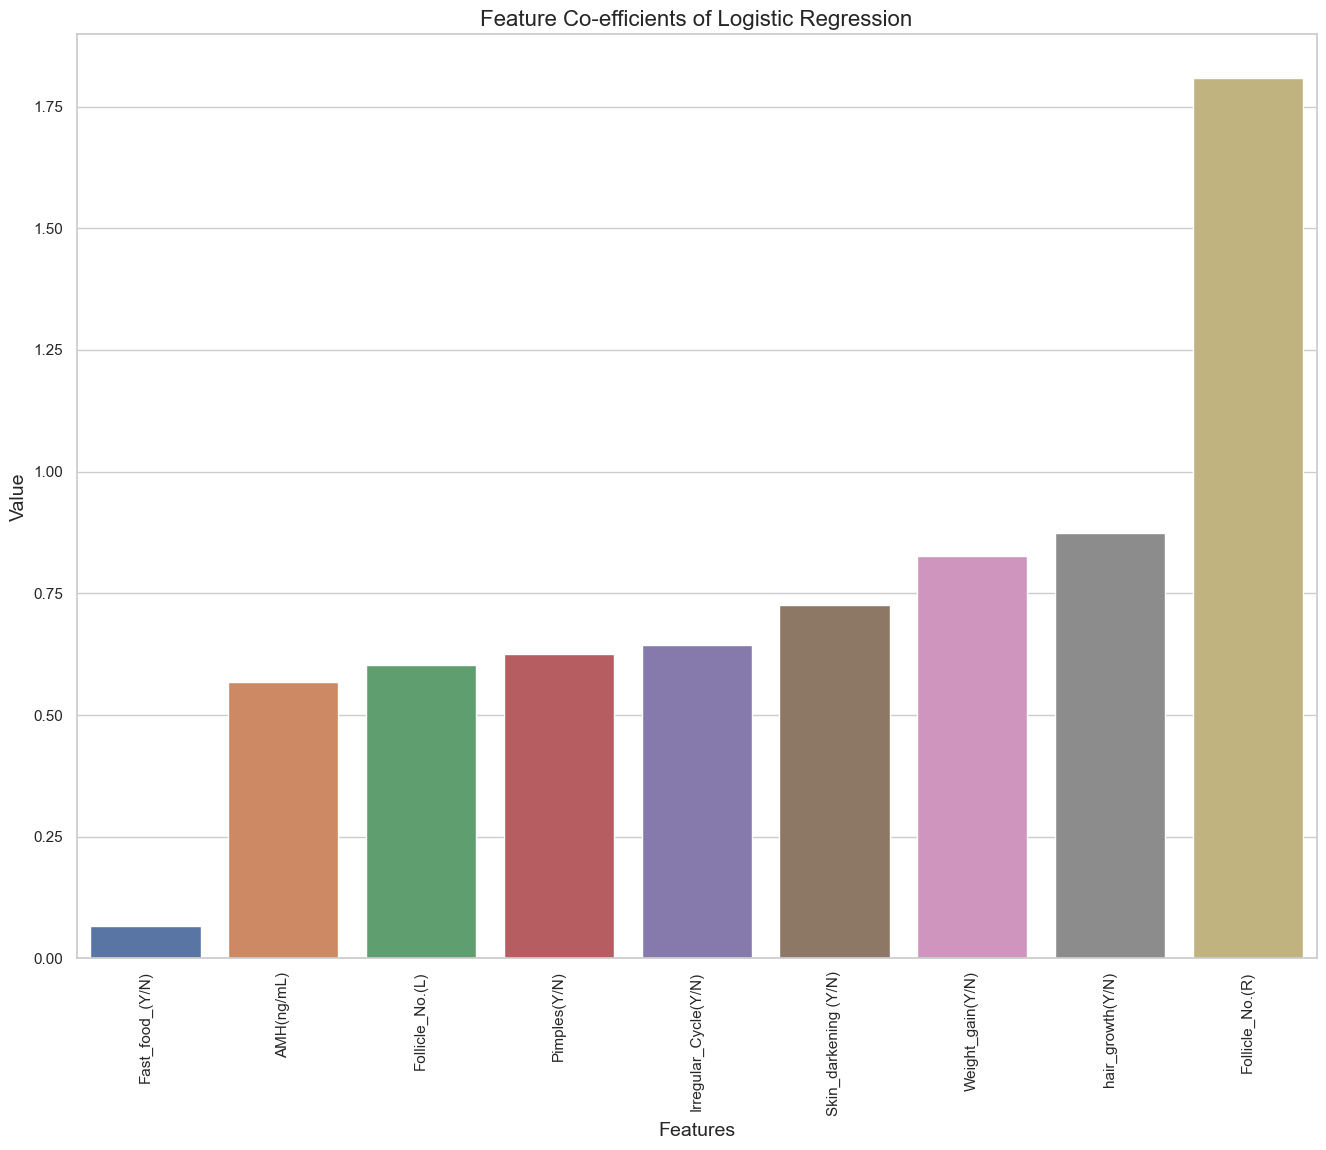

In [77]:
plt.figure(figsize= (16,12))
sns.barplot(x = sort_coef.index, y = sort_coef['coef'],)
plt.ylabel('Value',fontsize=14)
plt.xlabel('Features',fontsize=14)
plt.title('Feature Co-efficients of Logistic Regression',fontsize=16)
plt.xticks(rotation = 'vertical')
#plt.show()
plt.savefig('feat_coef_logreg.png')

In [78]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# define the PCA pipeline
pca_pipe = make_pipeline(PCA(), LogisticRegression())
# set the parameters to be searched through GridSearchCV
param_dict = {'pca__n_components': [2, 3, 4],
              'pca__whiten': [True, False],
              'logisticregression__C': [0.1, 1, 10]}
# create the instance of GridSearchCV using the PCA pipeline
grid_pca = GridSearchCV(pca_pipe, param_dict, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# fit the GridSearch to our data
grid_pca.fit(X_train, y_train)

print(grid_pca.best_score_)  # outputs the best metric score
print(grid_pca.best_params_)  # outputs the parameters with best result

# use the best estimator to make predictions on the train and test sets
train_pred = grid_pca.best_estimator_.predict(X_train)
y_pred = grid_pca.best_estimator_.predict(X_test)

# print evaluation metrics
print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f" % recall_score(y_train, train_pred))
print("Test Recall: %.3f" % recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f" % f1_score(y_test, y_pred))
print("Test Precision: %.3f" % precision_score(y_test, y_pred))





Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.9161490683229813
{'logisticregression__C': 1, 'pca__n_components': 2, 'pca__whiten': True}
Train Accuracy: 0.916
Test Accuracy: 0.943 

Train Recall: 0.827
Test Recall: 0.853 

Test F1: 0.921
Test Precision: 1.000


# **Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfcc = RandomForestClassifier(random_state=137,max_depth=5)

In [81]:
param_grid = {'n_estimators': [ 4, 6, 9], 
              'max_features': [ 'log2','sqrt',], 
              'criterion': [ 'gini', 'entropy'], 
              'min_samples_split': [ 5,8,10],
              'min_samples_leaf': [5,8,10]
             }

In [82]:
grid_tree=GridSearchCV(rfcc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [83]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=137),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [5, 8, 10],
                         'min_samples_split': [5, 8, 10],
                         'n_estimators': [4, 6, 9]},
             scoring='accuracy', verbose=1)

In [84]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9256443298969073
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 9}
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=5, min_samples_split=5, n_estimators=9,
                       random_state=137)


In [85]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.928
Test Accuracy: 0.943 

Train Recall: 0.913
Test Recall: 0.912 

Test F1: 0.925
Test Precision: 0.939


In [86]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.94      0.91      0.93        34

    accuracy                           0.94        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.94      0.94      0.94        87

Confusion Matrix: 
 [[51  2]
 [ 3 31]]


In [87]:
recalls['Random Forest'] = recall_score(y_test, y_pred)
accuracies['Random Forest'] = accuracy_score(y_test, y_pred)
precisions['Random Forest'] = precision_score(y_test, y_pred)
f1['Random Forest'] = f1_score(y_test, y_pred)
recalls

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9117647058823529}

In [88]:
accuracies

{'Logistic Regression': 0.9540229885057471,
 'Random Forest': 0.9425287356321839}

In [89]:
precisions

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9393939393939394}

In [90]:
f1

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9253731343283583}

In [91]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [92]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Random Forest', fontsize=20)

Confusion Matrix, without normalization
[[51  2]
 [ 3 31]]


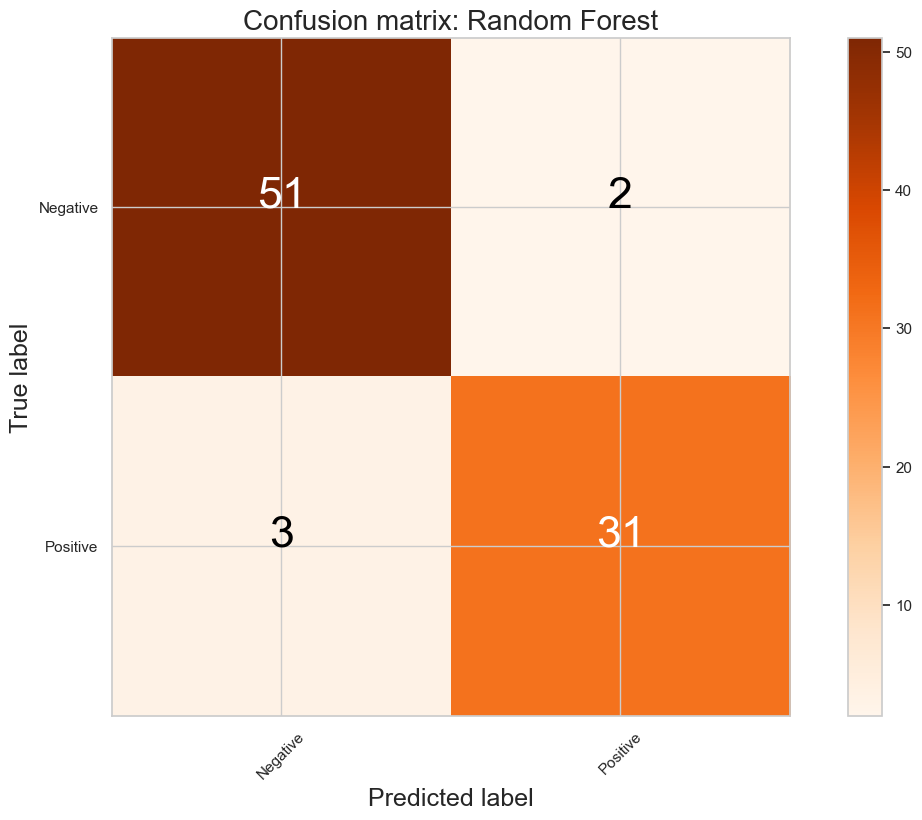

In [93]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_RF.png')

In [94]:
rfc= grid_tree.best_estimator_

In [95]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

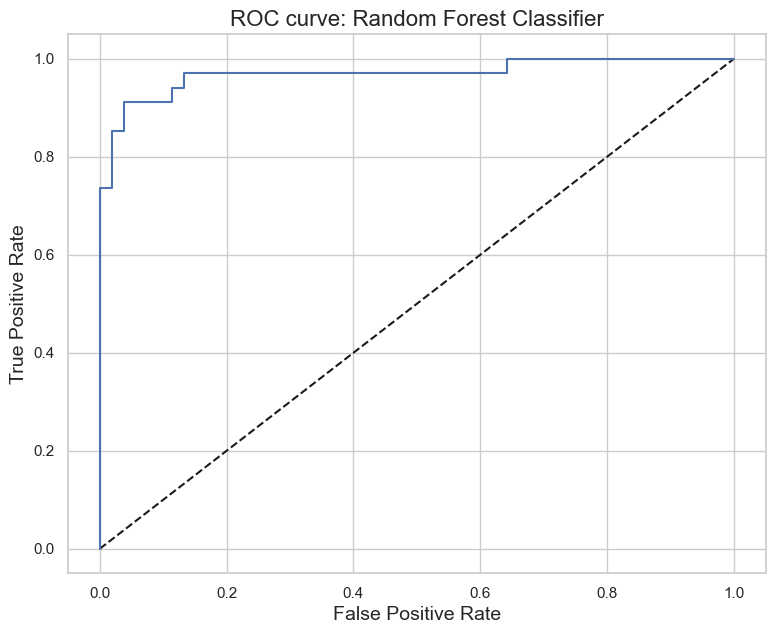

In [96]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Random Forest Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_RF.png')

In [97]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Random Forest Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Random Forest Classifier: 0.969


In [98]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("ROC Score of Random Forest Classifier: %.3f"%cross_val_score(rfc, features, target, cv=10, scoring='roc_auc').mean())

ROC Score of Random Forest Classifier: 0.957


In [99]:
rfc.feature_importances_

array([0.35105058, 0.0719342 , 0.10874167, 0.17727733, 0.1202934 ,
       0.07307209, 0.02201468, 0.02305173, 0.05256432])

In [100]:
aa= pd.DataFrame({'Feature_names':X_test.columns,'Importances':rfc.feature_importances_})
rfc_1= aa.sort_values(by='Importances',ascending=False)
rfc_1

,Feature_names,Importances
0,Follicle_No.(R),0.351051
3,hair_growth(Y/N),0.177277
4,Weight_gain(Y/N),0.120293
2,Skin_darkening (Y/N),0.108742
5,Irregular_Cycle(Y/N),0.073072
1,Follicle_No.(L),0.071934
8,AMH(ng/mL),0.052564
7,Pimples(Y/N),0.023052
6,Fast_food_(Y/N),0.022015


In [101]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rfc,X_train)

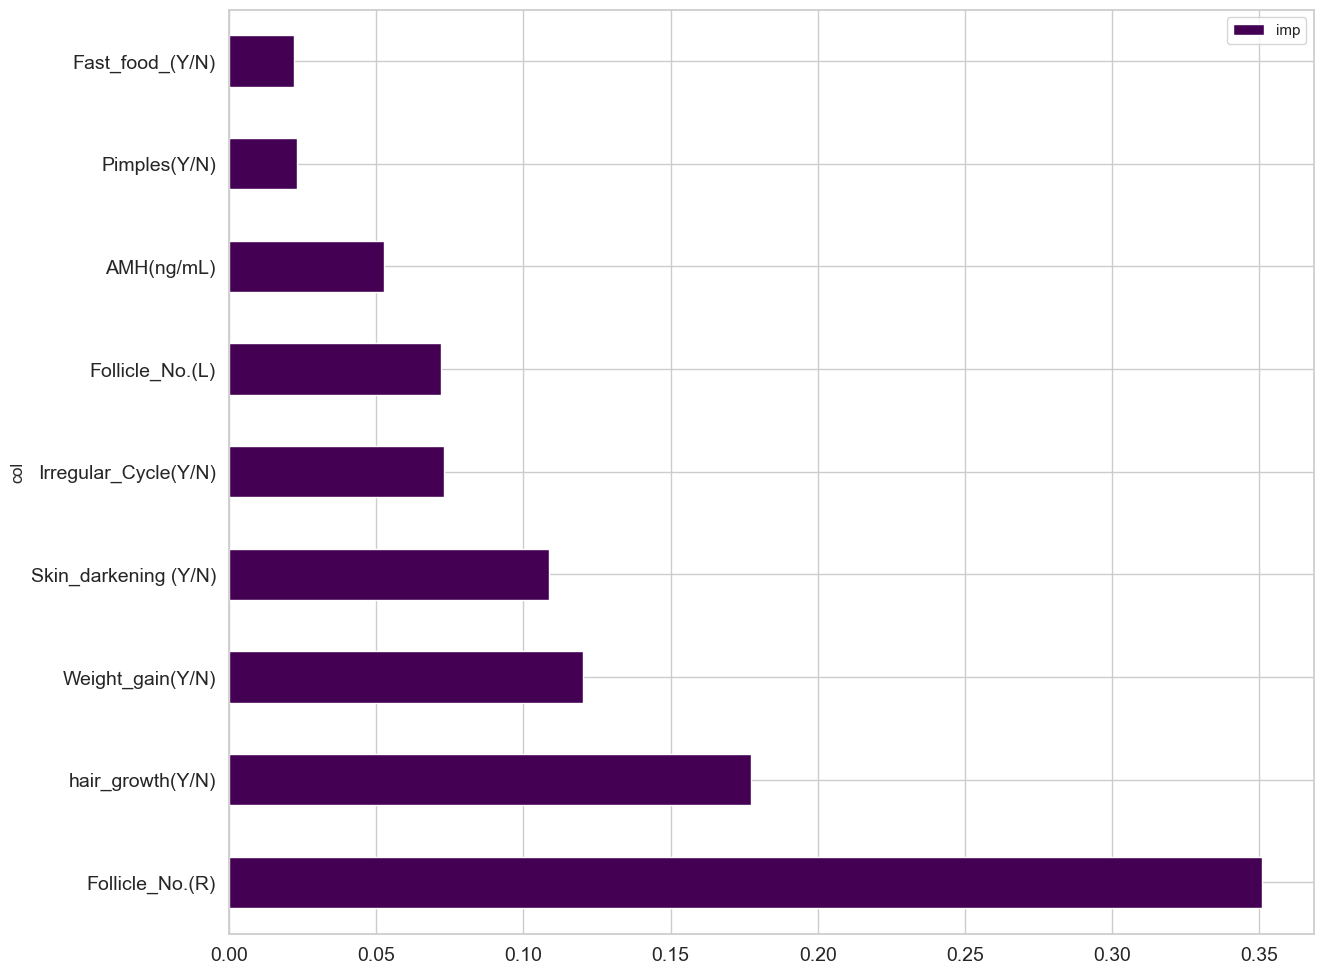

In [102]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('Random Forest Feature Importance.png')

# **ADABoost**

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada = AdaBoostClassifier()

In [105]:
param_grid = {'n_estimators': [100,200,300],
              'algorithm': ['SAMME','SAMME.R'],
              'learning_rate': [0.01,0.1,1.0] }

In [106]:
grid_tree=GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [107]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [108]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9194802405498281
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300}
AdaBoostClassifier(learning_rate=0.1, n_estimators=300)


In [109]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.922
Test Accuracy: 0.920 

Train Recall: 0.885
Test Recall: 0.912 

Test F1: 0.899
Test Precision: 0.886


In [110]:
ada= grid_tree.best_estimator_

In [111]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.89      0.91      0.90        34

    accuracy                           0.92        87
   macro avg       0.91      0.92      0.92        87
weighted avg       0.92      0.92      0.92        87

Confusion Matrix: 
 [[49  4]
 [ 3 31]]


In [112]:
recalls['AdaBoost'] = recall_score(y_test, y_pred)
accuracies['AdaBoost'] = accuracy_score(y_test, y_pred)
precisions['AdaBoost'] = precision_score(y_test, y_pred)
f1['AdaBoost'] =f1_score(y_test, y_pred)
recalls

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9117647058823529,
 'AdaBoost': 0.9117647058823529}

In [113]:
accuracies

{'Logistic Regression': 0.9540229885057471,
 'Random Forest': 0.9425287356321839,
 'AdaBoost': 0.9195402298850575}

In [114]:
precisions

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9393939393939394,
 'AdaBoost': 0.8857142857142857}

In [115]:
f1

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9253731343283583,
 'AdaBoost': 0.8985507246376812}

In [116]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [117]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: AdaBoost', fontsize=20)

Confusion Matrix, without normalization
[[49  4]
 [ 3 31]]


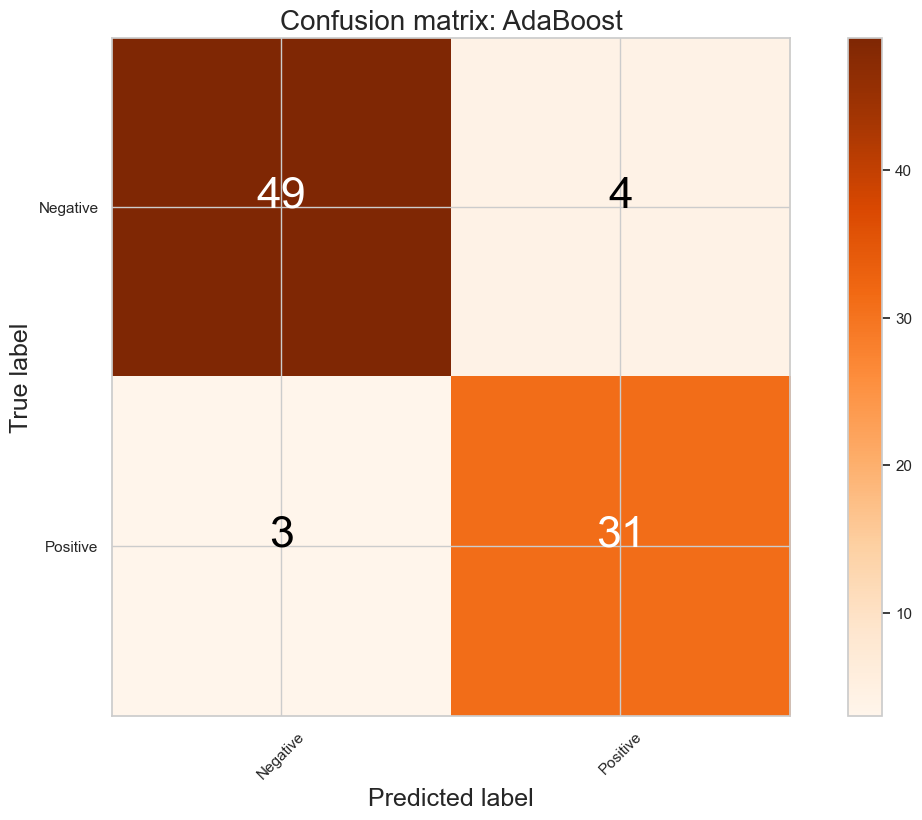

In [118]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Ada.png')

In [119]:
from sklearn.metrics import roc_curve
y_pred_proba = ada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

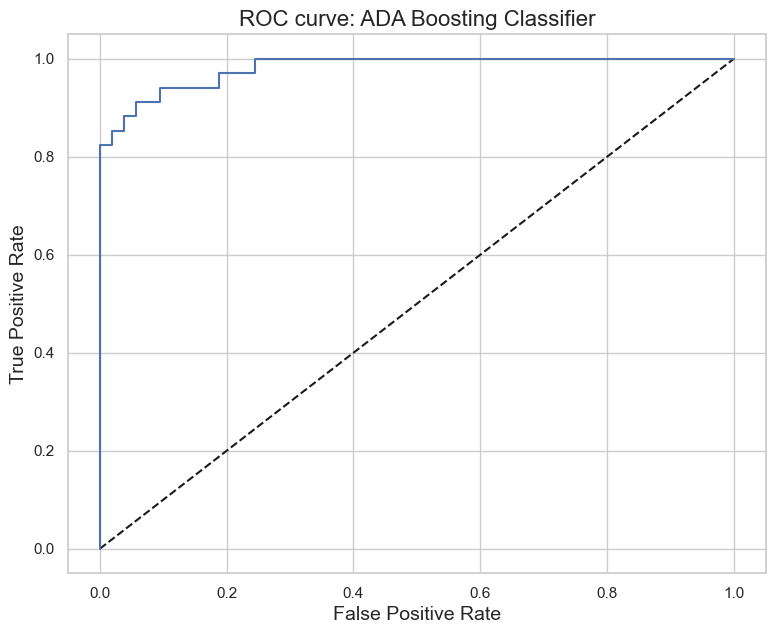

In [120]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ADA Boosting Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: ADA Boosting Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Ada.png')

In [121]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of AdaBoost Classifier: %.3f"%metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of AdaBoost Classifier: 0.981


In [122]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of AdaBoost Classifier: %.3f"%cross_val_score(ada, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of AdaBoost Classifier: 0.957


In [123]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(ada,X_train)

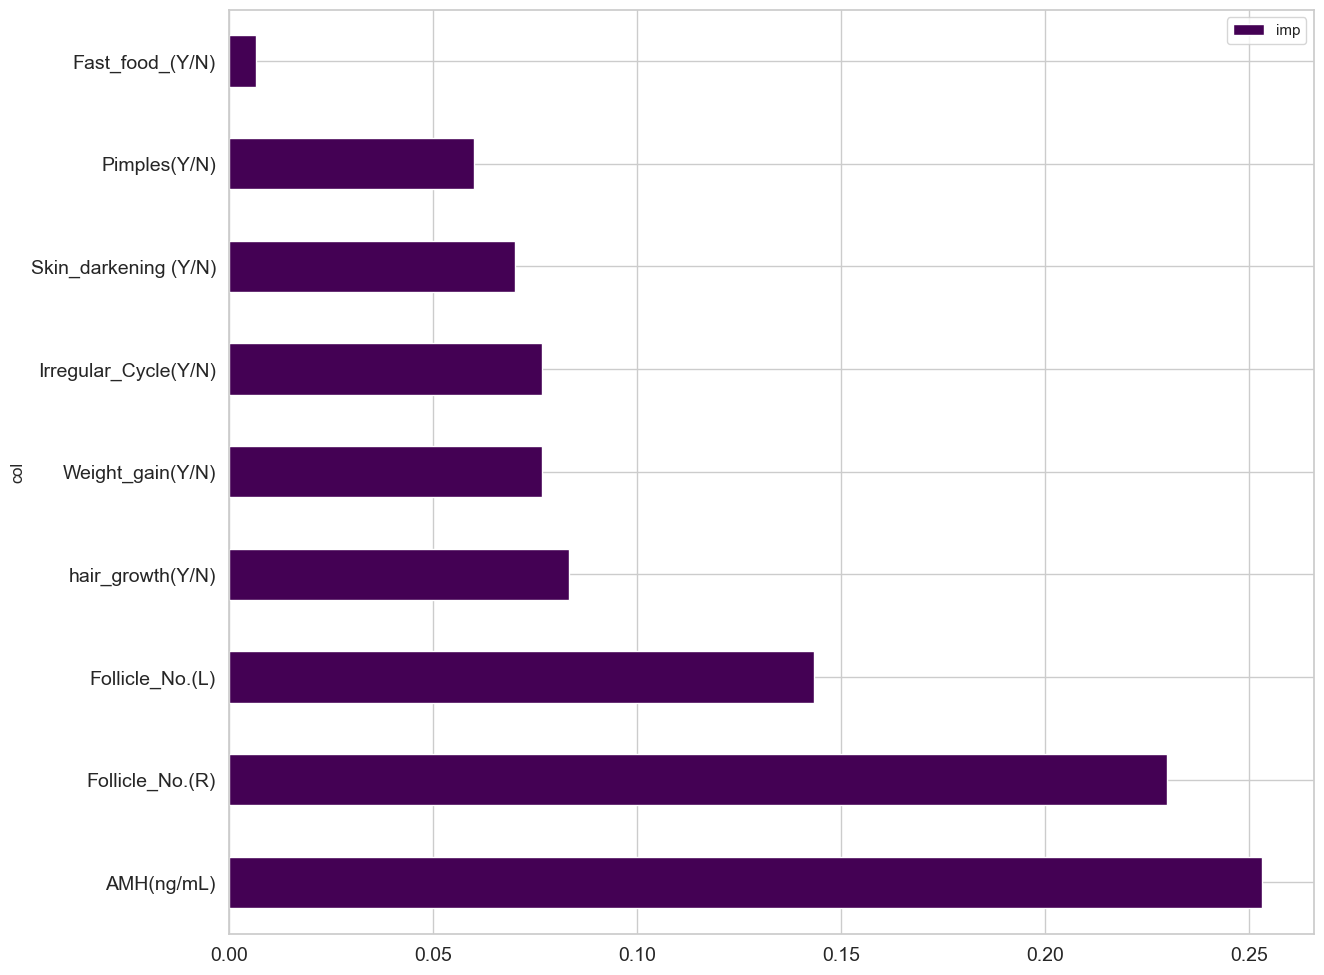

In [124]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('AdaBoost Feature Importance.png')

# **Voting Classifier**

In [125]:
from sklearn.ensemble import VotingClassifier

In [126]:
# instantiate the best model objects
lr_clf = logreg
ada_clf = ada
rf_clf=rfc

In [127]:
# put in different combinations of the best models to see which yeilds the best results
voting_clf = VotingClassifier(
                estimators=[('LogisticRegression', lr_clf),
                            ('ADAboost', ada_clf),('RandomForest', rf_clf)], voting='soft')

voting_clf.fit(X_train_res, y_train_res)

y_pred = voting_clf.predict(X_test)
train_pred = voting_clf.predict(X_train)


print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.934
Test Accuracy: 0.931 

Train Recall: 0.904
Test Recall: 0.912 

Test F1: 0.912
Test Precision: 0.912


In [128]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.91      0.91      0.91        34

    accuracy                           0.93        87
   macro avg       0.93      0.93      0.93        87
weighted avg       0.93      0.93      0.93        87

Confusion Matrix: 
 [[50  3]
 [ 3 31]]


In [129]:
recalls['Voting Classifier'] = recall_score(y_test, y_pred)
accuracies['Voting Classifier'] = accuracy_score(y_test, y_pred)
precisions['Voting Classifier'] = precision_score(y_test, y_pred)
f1['Voting Classifier'] = f1_score(y_test, y_pred)
recalls

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9117647058823529,
 'AdaBoost': 0.9117647058823529,
 'Voting Classifier': 0.9117647058823529}

In [130]:
accuracies

{'Logistic Regression': 0.9540229885057471,
 'Random Forest': 0.9425287356321839,
 'AdaBoost': 0.9195402298850575,
 'Voting Classifier': 0.9310344827586207}

In [131]:
precisions

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9393939393939394,
 'AdaBoost': 0.8857142857142857,
 'Voting Classifier': 0.9117647058823529}

In [132]:
f1

{'Logistic Regression': 0.9411764705882353,
 'Random Forest': 0.9253731343283583,
 'AdaBoost': 0.8985507246376812,
 'Voting Classifier': 0.9117647058823528}

In [133]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [134]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Voting Classifier', fontsize=20)

Confusion Matrix, without normalization
[[50  3]
 [ 3 31]]


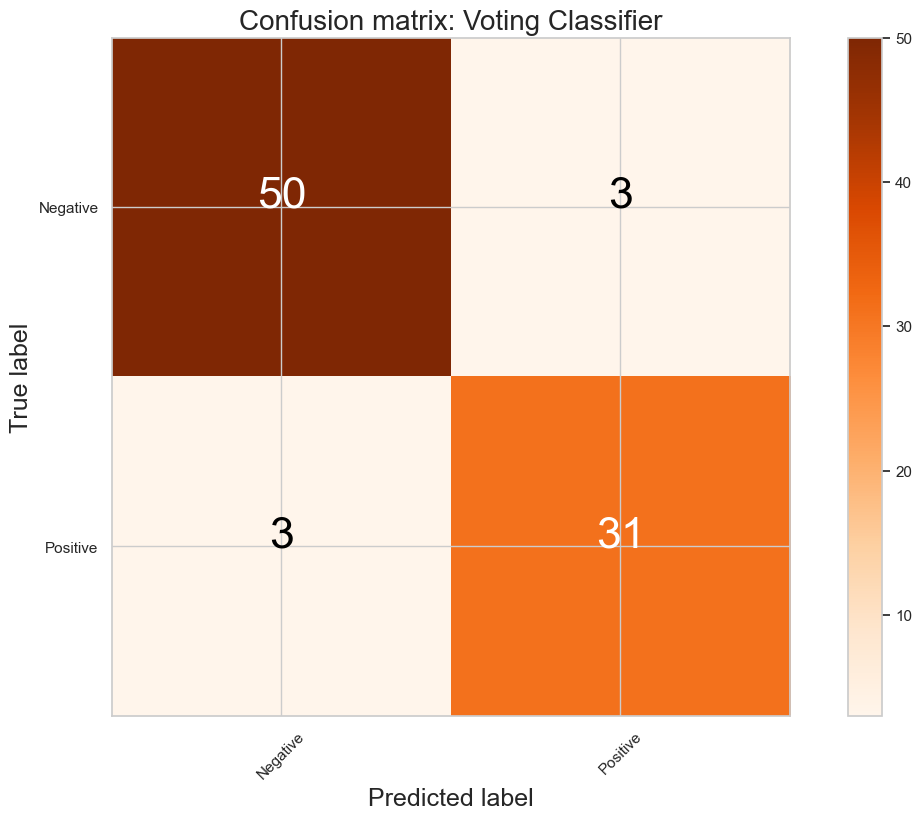

In [135]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Vote.png')

In [136]:
from sklearn.metrics import roc_curve
y_pred_proba = voting_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

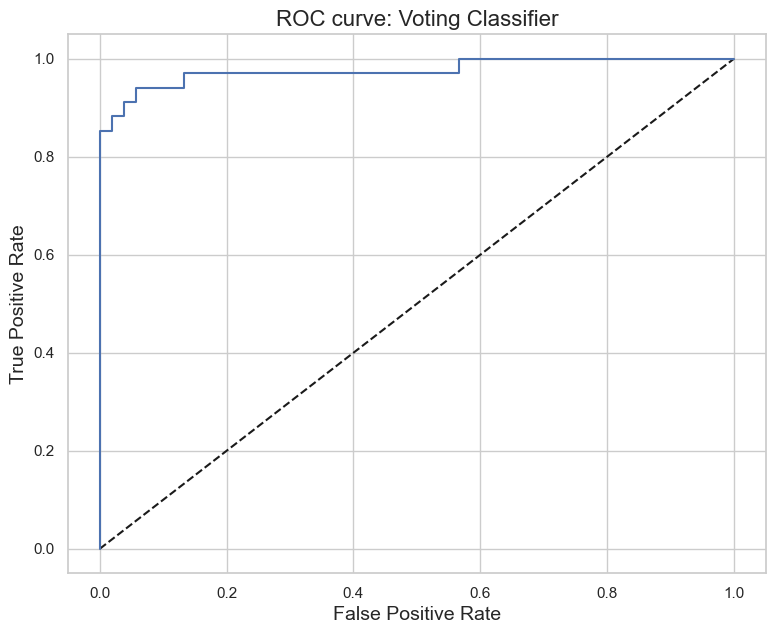

In [137]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Voting Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Voting Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Vote.png')

In [138]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of VotingClassifier: %.3f"%(metrics.roc_auc_score(y_test, y_pred_proba)))

ROC Score of VotingClassifier: 0.976


# **Final Model**

In [139]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # avoid outputing scientific notation
scores = pd.DataFrame.from_dict(recalls, orient='index', columns=['Recall Score'])
scores['Recall Score']= scores['Recall Score']*100
scores

,Recall Score
Logistic Regression,94.118
Random Forest,91.176
AdaBoost,91.176
Voting Classifier,91.176


In [140]:
best_accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy Score'])
best_accuracies['Accuracy Score']= best_accuracies['Accuracy Score']*100
best_accuracies

,Accuracy Score
Logistic Regression,95.402
Random Forest,94.253
AdaBoost,91.954
Voting Classifier,93.103


In [141]:
best_accuracies.sort_values(by='Accuracy Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Accuracy Score
Logistic Regression,95.402
Random Forest,94.253
Voting Classifier,93.103
AdaBoost,91.954


In [142]:
scores.sort_values(by='Recall Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Recall Score
Logistic Regression,94.118
Random Forest,91.176
AdaBoost,91.176
Voting Classifier,91.176


In [143]:
best_precisions = pd.DataFrame.from_dict(precisions, orient='index', columns=['Precision Score'])
best_precisions['Precision Score']= best_precisions['Precision Score']*100
best_precisions.sort_values(by='Precision Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Precision Score
Logistic Regression,94.118
Random Forest,93.939
Voting Classifier,91.176
AdaBoost,88.571


In [144]:
best_f1 = pd.DataFrame.from_dict(accuracies, orient='index', columns=['f1 Score'])
best_f1['f1 Score']= best_f1['f1 Score']*100
best_f1.sort_values(by='f1 Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,f1 Score
Logistic Regression,95.402
Random Forest,94.253
Voting Classifier,93.103
AdaBoost,91.954


In [145]:
best_accuracies

,Accuracy Score
Logistic Regression,95.402
Random Forest,94.253
AdaBoost,91.954
Voting Classifier,93.103


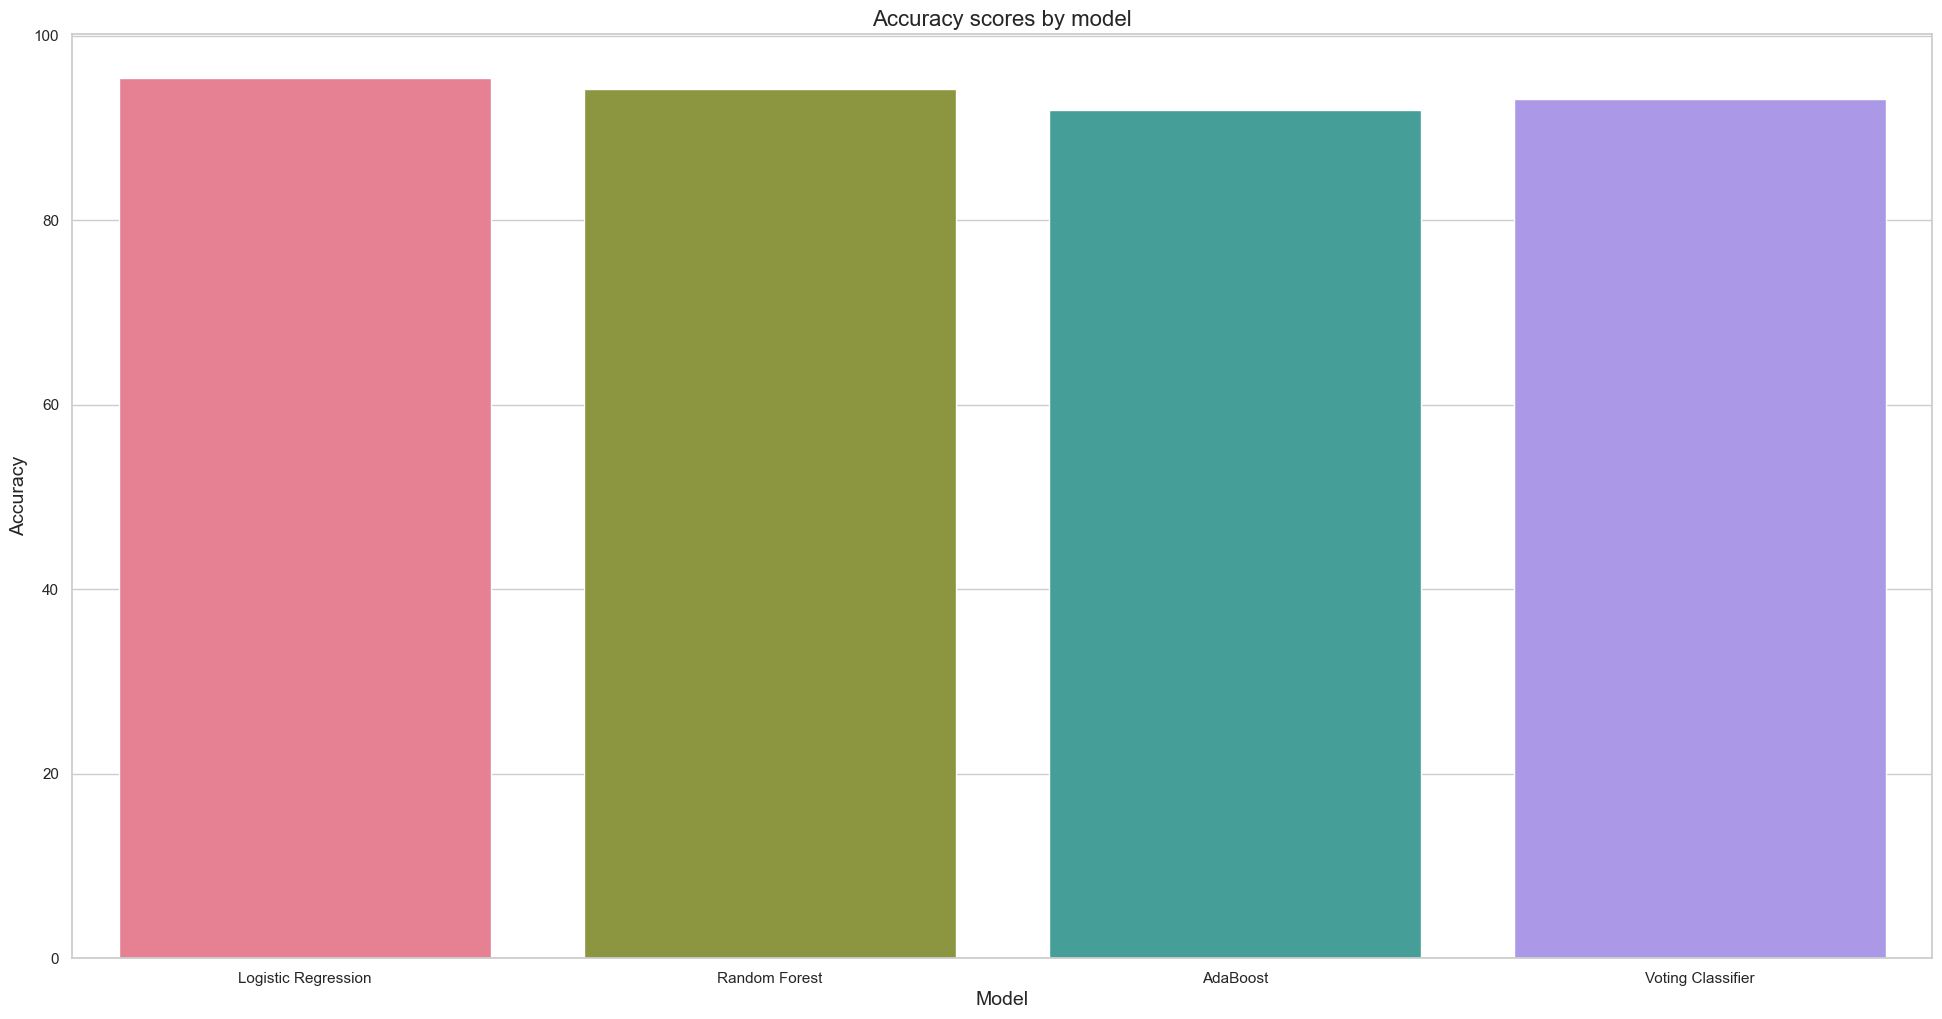

In [146]:
best_accuracies
plt.figure(figsize= (24,12))
sns.barplot(x = best_accuracies.index, y =best_accuracies['Accuracy Score'], palette= 'husl')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Model',fontsize=14)
plt.title('Accuracy scores by model',fontsize=16)
#plt.show()
plt.savefig('Best_accuracies.png')


In [147]:
final_model = logreg

In [148]:
final_model.fit(test_features,test_target)
#logreg.fit(small_feat,small_target)

LogisticRegression(C=0.1, penalty='none')

In [149]:
y_pred = final_model.predict(test_features)  # make predictions on the target variable

print(" Final Model Recall: %.3f" % recall_score(test_target, y_pred), '\n')
print("Final model Accuracy: %.3f" % accuracy_score(test_target, y_pred), '\n')
print("Final model Precision: %.3f" % precision_score(test_target, y_pred), '\n')
print("Final model f1 Score: %.3f" % f1_score(test_target, y_pred), '\n')
print("Final model Confusion Matrix: \n", metrics.confusion_matrix(test_target, y_pred))



 Final Model Recall: 0.872 

Final model Accuracy: 0.944 

Final model Precision: 0.971 

Final model f1 Score: 0.919 

Final model Confusion Matrix: 
 [[68  1]
 [ 5 34]]


In [150]:
# save the scoring metrics in a dataframe
pd.DataFrame(data=[recall_score(test_target, y_pred),accuracy_score(test_target, y_pred),precision_score(test_target, y_pred), f1_score(test_target,y_pred)],
             index=["Recall", "Accuracy","Precision","F1 Score"],columns=['Final Model'])

,Final Model
Recall,0.872
Accuracy,0.944
Precision,0.971
F1 Score,0.919


In [151]:
print("Classification Report: \n\n", classification_report(test_target, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_target, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.97      0.87      0.92        39

    accuracy                           0.94       108
   macro avg       0.95      0.93      0.94       108
weighted avg       0.95      0.94      0.94       108

Confusion Matrix: 
 [[68  1]
 [ 5 34]]


In [152]:
cm = confusion_matrix(test_target,y_pred)
classes = ['Negative', 'Positive']

In [153]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Final Model', fontsize=20)

Confusion Matrix, without normalization
[[68  1]
 [ 5 34]]


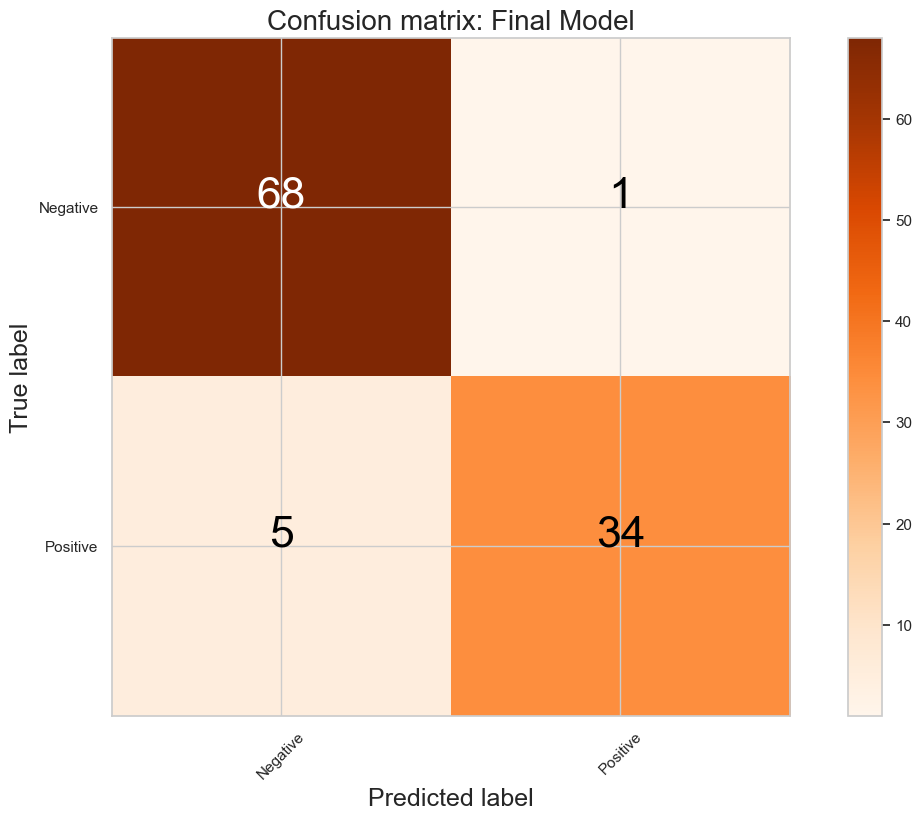

In [154]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Final_Model.png')

In [155]:
from sklearn.metrics import roc_curve
y_pred_proba = final_model.predict_proba(test_features)[:,1]
fpr, tpr, thresholds = roc_curve(test_target, y_pred_proba)

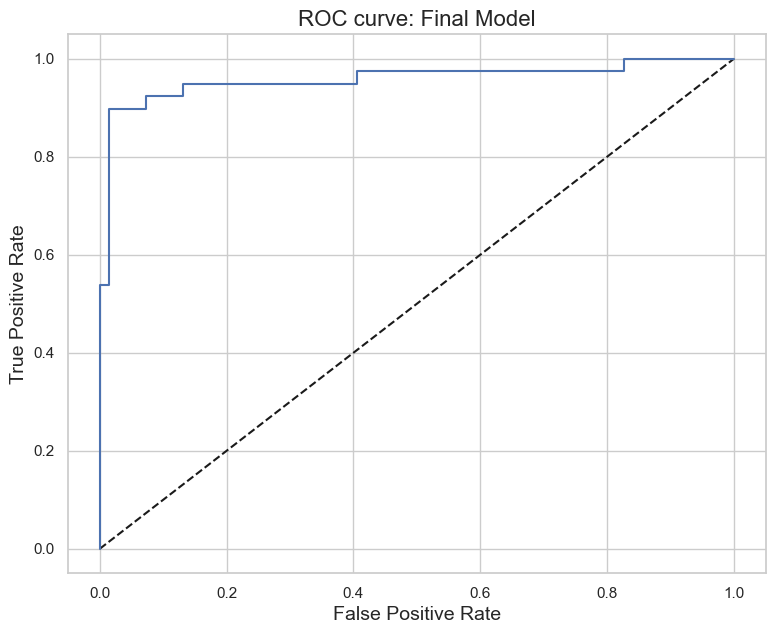

In [156]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Final Model')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Final Model',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Final_Model.png')

In [157]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [158]:
evaluate_threshold(0.5)

Sensitivity: 0.5384615384615384
Specificity: 0.9855072463768116


In [159]:
evaluate_threshold(0.40)

Sensitivity: 0.9230769230769231
Specificity: 0.927536231884058


In [160]:

THRESHOLD = 0.45  # adjust the threshold
y_pred = np.where(final_model.predict_proba(test_features)[:,1] > THRESHOLD, 1, 0)  # make predictions based on threshold

# save the scoring metrics in a dataframe
pd.DataFrame(data=[recall_score(test_target, y_pred),accuracy_score(test_target, y_pred),precision_score(test_target, y_pred), f1_score(test_target,y_pred)],
             index=["Recall", "Accuracy","Precision","F1 Score"],columns=['45% threshold'])

,45% threshold
Recall,0.897
Accuracy,0.935
Precision,0.921
F1 Score,0.909


In [161]:
print(metrics.confusion_matrix(test_target, y_pred))

[[66  3]
 [ 4 35]]


In [162]:
cm = confusion_matrix(test_target,y_pred)
classes = ['Negative', 'Positive']

In [163]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Final Model(0.45 Threshold)', fontsize=20)

Confusion Matrix, without normalization
[[66  3]
 [ 4 35]]


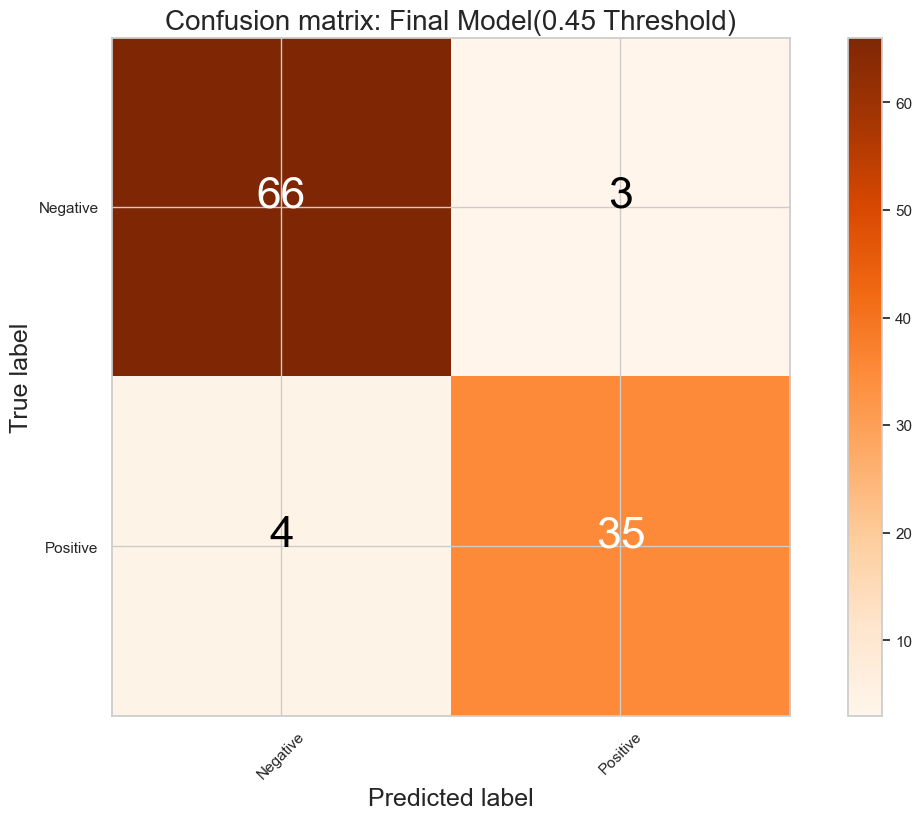

In [164]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Final_Model_Validation.png')

In [165]:
final_model.fit(model_feat,model_target)

LogisticRegression(C=0.1, penalty='none')

In [166]:
final_model

LogisticRegression(C=0.1, penalty='none')

In [167]:
y_pred = final_model.predict(model_feat)  # make predictions on the target variable

print(" Test Recall: ", recall_score(model_target, y_pred), '\n')
print("Test Accuracy:", accuracy_score(model_target, y_pred), '\n')

print(metrics.confusion_matrix(model_target, y_pred))

 Test Recall:  0.8531073446327684 

Test Accuracy: 0.9149722735674677 

[[344  20]
 [ 26 151]]


In [168]:
import pickle

pickle_out = open("logistic_best.sav","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [169]:
model = pickle.load(open('logistic_best.sav', 'rb'))
print('model is loaded')

model is loaded
